In [1]:
# Start by importing the needed packages into my notebook
# Import Data analysis packages
import numpy as np
import pandas as pd
# Import the stats librayr from numpy
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#char_studio pushes your charts to the cloud 
import chart_studio.plotly as py
#plotly.offline doesn't push your charts to the clouds
import plotly.offline as pyo
#allows us to create the Data and Figure objects
from plotly.graph_objs import *

In [3]:
from sklearn.utils import shuffle
#lets us see the charts in an iPython Notebook
pyo.offline.init_notebook_mode() # run at the start of every ipython

In [4]:
#Importing Maize Dataframe
Irish_df=pd.read_csv("Irish_df.csv")
Irish_df.head()

Unnamed: 0       combined_id   Unique_id  Segment_id Province_name  \
0           1   1111035Season A   1111035.0    111103.0        Kigali   
1          89   1111107Season A   1111107.0    111110.0        Kigali   
2          90  11111015Season A  11111015.0    111110.0        Kigali   
3          91  11111018Season A  11111018.0    111110.0        Kigali   
4         254  11112234Season A  11112234.0    111122.0        Kigali   

  District_name  Plot_number  Plot_Area_sqm Cropping_system  Number_of_crops  \
0    NYARUGENGE          5.0    1007.767700           Mixed              3.0   
1    NYARUGENGE          7.0     858.524841           Mixed              3.0   
2    NYARUGENGE         15.0     251.611847           Mixed              2.0   
3    NYARUGENGE         18.0     157.741714            Pure              1.0   
4    NYARUGENGE         34.0     423.140167           Mixed              8.0   

   ... Coeff_harvested   Coeff_seed Coeff_fertiliser  \
0  ...     1562.860212  2250.000000         0.000000   
1  ...     1164.788697   349.436609     10483.098276   
2  ...     2445.769723  1467.461834     30572.121543   
3  ...     3169.738522   633.947704     12678.954087   
4  ...     1985.157915   157.552216         0.000000   

  Coeff_inorganic_fertiliser Qtity_inorganic_npk Qtity_inorganic_urea  \
0                   0.000000                 0.0                  0.0   
1                   0.000000                 0.0                  0.0   
2                 611.442431                 0.0                 10.0   
3                   0.000000                 0.0                  0.0   
4                   0.000000                 0.0                  0.0   

   Coeff_inorganic_meter_npk Coeff_inorganic_npk  Coeff_inorganic_meter_urea  \
0                        0.0                 0.0                    0.000000   
1                        0.0                 0.0                    0.000000   
2                        0.0                 0.0                    0.061144   
3                        0.0                 0.0                    0.000000   
4                        0.0                 0.0                    0.000000   

   Coeff_inorganic_urea  
0              0.000000  
1              0.000000  
2            611.442431  
3              0.000000  
4              0.000000  

[5 rows x 59 columns]

In [5]:
#Irish_df[Irish_df['District_name']=='RULINDO']

In [6]:
Irish_df['Season1'].value_counts()

SeasonA2019    1928
SeasonB2019    1763
SeasonA2017    1459
SeasonB2018    1019
SeasonB2017    1001
SeasonA2018     950
SeasonC2017     484
SeasonC2018     371
SeasonC2019     321
Name: Season1, dtype: int64

In [7]:
#Irish_df=Irish_df[Irish_df['Season']=='Season A']

In [8]:
Irish_df.shape

(9296, 59)

In [9]:
Irish_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9296 entries, 0 to 9295
Data columns (total 59 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Unnamed: 0                        9296 non-null   int64  
 1   combined_id                       9296 non-null   object 
 2   Unique_id                         9296 non-null   float64
 3   Segment_id                        9296 non-null   float64
 4   Province_name                     9296 non-null   object 
 5   District_name                     9296 non-null   object 
 6   Plot_number                       9296 non-null   float64
 7   Plot_Area_sqm                     7533 non-null   float64
 8   Cropping_system                   9296 non-null   object 
 9   Number_of_crops                   9296 non-null   float64
 10  Crop_name                         9296 non-null   object 
 11  Crop_Area_sqm                     8975 non-null   float64
 12  Type_s

In [10]:
Irish_df.isnull().sum()

Unnamed: 0                             0
combined_id                            0
Unique_id                              0
Segment_id                             0
Province_name                          0
District_name                          0
Plot_number                            0
Plot_Area_sqm                       1763
Cropping_system                        0
Number_of_crops                        0
Crop_name                              0
Crop_Area_sqm                        321
Type_seeds_sown                      321
Season                                 0
Season1                                0
CropGroup                              0
Crop_Area_ha                           0
Agri_year                              0
Qtity_seeds_sown                       0
Total_qtity_harvested                  0
Usage_organic_fertilizer               0
Qtity_organic_fertiliser               0
Usage_inorganic_fertilizer             0
inOrganic_fertiliser_type           4194
inorganic_fertil

In [11]:
Irish_df['Yield'].max()

68496.30809264764

In [12]:
q1=Irish_df['Yield'].quantile(0.25)
q3=Irish_df['Yield'].quantile(0.75)
iqr=q3-q1 # find interquartile of each crop in district
high_value=(1.5*iqr)+q3 # find the highest value of outliers
low_value=q1-(1.5*iqr) # find the smallest value of outliers for each crops

In [13]:
print(high_value)
print(low_value)
print(q1)
print(q3)
print(iqr)

20781.938281451425
-7850.525506164446
2886.6484141915066
10044.764361095475
7158.1159469039685


In [14]:
mean = Irish_df.loc[Irish_df['Yield']<high_value, 'Yield'].mean()
print(mean)

6678.027916509511


In [15]:
median = Irish_df.loc[Irish_df['Yield']<high_value, 'Yield'].median()
print(mean)

6678.027916509511


In [16]:
Irish_df['Yield']= np.where(Irish_df['Yield'] >high_value, mean,Irish_df['Yield'])

In [17]:
Irish_df['Type_seeds_sown'].fillna(method='bfill', inplace=True)

In [18]:
Irish_df['Type_seeds_sown'].unique()

array(['Traditional seeds', 'Improved seeds', 'Improved+traditional ',
       'Both traditional & Improved', 'Traditional and Improved seeds'],
      dtype=object)

In [19]:
Irish_df['Type_seeds_sown'].value_counts()

Traditional seeds                 9038
Improved seeds                     242
Both traditional & Improved          9
Improved+traditional                 4
Traditional and Improved seeds       3
Name: Type_seeds_sown, dtype: int64

In [20]:
Irish_df.shape

(9296, 59)

In [21]:
Irish_df['Type_seeds_sown'].replace('Improved+traditional ','Both traditional & Improved', inplace=True)
Irish_df['Type_seeds_sown'].replace('Traditional and Improved seeds','Both traditional & Improved', inplace=True)

In [22]:
Irish_df['Type_seeds_sown'].value_counts()

Traditional seeds              9038
Improved seeds                  242
Both traditional & Improved      16
Name: Type_seeds_sown, dtype: int64

In [23]:
Irish_df.columns

Index(['Unnamed: 0', 'combined_id', 'Unique_id', 'Segment_id', 'Province_name',
       'District_name', 'Plot_number', 'Plot_Area_sqm', 'Cropping_system',
       'Number_of_crops', 'Crop_name', 'Crop_Area_sqm', 'Type_seeds_sown',
       'Season', 'Season1', 'CropGroup', 'Crop_Area_ha', 'Agri_year',
       'Qtity_seeds_sown', 'Total_qtity_harvested', 'Usage_organic_fertilizer',
       'Qtity_organic_fertiliser', 'Usage_inorganic_fertilizer',
       'inOrganic_fertiliser_type', 'inorganic_fertiliser_unity',
       'total_qtity_inorganic_feltiliser', 'Usage_pesticides',
       'Irrigation_use', 'Real_Qtity_inorganic', 'Yield', 'combined_id1',
       'Precipitation_season', 'Elevation', 'Minimum_temp', 'Maximum_temp',
       'Humidity', 'Average_Wind_speed', 'Windspeed', 'Radiation', 'Year',
       'district_id', 'Precipitation_year', 'crop_area_sq',
       'Precipitation_season_new', 'Humidity_new', 'Coeff_Square_meter',
       'Coeff_Seeds_meter', 'Coeff_fert_meter', 'Coeff_inorganic_met

In [24]:
Irish_data=Irish_df.values

In [25]:
Qtity_seeds_sown=[]
for irish in Irish_data:
    i=irish[-9]
    if i>=10000:
        Qtity_seeds_sown.append(4000) 
    elif (i>=7000)&(i<10000):
        Qtity_seeds_sown.append(3800)
    elif (i>=6000)&(i<7000):
        Qtity_seeds_sown.append(3750)
    elif (i>=5000)&(i<6000):
        Qtity_seeds_sown.append(3600)
    elif (i>=4000)&(i<5000):
        Qtity_seeds_sown.append(3500)
    elif (i>=3500)&(i<4000):
        Qtity_seeds_sown.append(3410)
    elif (i>=3400)&(i<3500):
        Qtity_seeds_sown.append(3340)
    elif (i>=3200)&(i<3400):
        Qtity_seeds_sown.append(3270)
    elif (i>=3100)&(i<3200):
        Qtity_seeds_sown.append(3150)
    elif (i<50):
        Qtity_seeds_sown.append(1000)
    elif (i>=50)&(i<75):
        Qtity_seeds_sown.append(1150)
    elif (i>=75)&(i<90):
        Qtity_seeds_sown.append(1175)
    elif (i>=90)&(i<100):
        Qtity_seeds_sown.append(1190)
    elif (i>=100)&(i<150):
        Qtity_seeds_sown.append(1215)
    elif (i>=150)&(i<175):
        Qtity_seeds_sown.append(1240)
    elif (i>=175)&(i<190):
        Qtity_seeds_sown.append(1275)
    elif (i>=190)&(i<195):
        Qtity_seeds_sown.append(1260)
    elif (i>=195)&(i<200):
        Qtity_seeds_sown.append(1210)
    elif (i>=200)&(i<230):
        Qtity_seeds_sown.append(1280)
    elif (i>=230)&(i<250):
        Qtity_seeds_sown.append(1375)
        
    elif (i>=250)&(i<255):
        Qtity_seeds_sown.append(1340)
    elif (i>=255)&(i<300):
        Qtity_seeds_sown.append(1380)
    elif (i>=300)&(i<310):
        Qtity_seeds_sown.append(1350)
        
    elif (i>=310)&(i<350):
        Qtity_seeds_sown.append(1400)
    elif (i>=350)&(i<400):
        Qtity_seeds_sown.append(1440)
    elif (i>=400)&(i<500):
        Qtity_seeds_sown.append(1500)
    elif (i>=500)&(i<600):
        Qtity_seeds_sown.append(1570)
    elif (i>=600)&(i<700):
        Qtity_seeds_sown.append(1620)
    elif (i>=700)&(i<800):
        Qtity_seeds_sown.append(1680)
    elif (i>=800)&(i<900):
        Qtity_seeds_sown.append(1720)
    elif (i>=900)&(i<1000):
        Qtity_seeds_sown.append(1010)
    elif (i>=1000)&(i<1100):
        Qtity_seeds_sown.append(1100)
    else:
        Qtity_seeds_sown.append(i)

In [26]:
Irish_df['Total_qtity_seeds_sown']=Qtity_seeds_sown

In [27]:
Irish_df['Real_qtity_seeds_sown']=(Irish_df['Total_qtity_seeds_sown']*Irish_df['crop_area_sq'])/10000

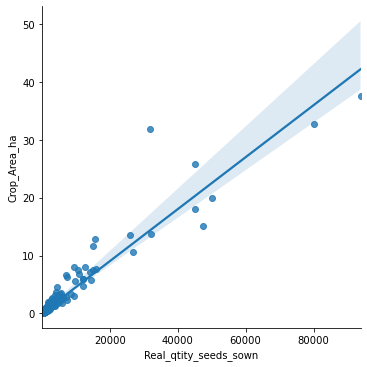

In [28]:
sns.lmplot(x='Real_qtity_seeds_sown',y='Crop_Area_ha',data=Irish_df)

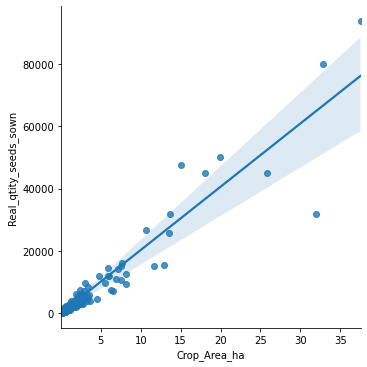

In [29]:
sns.lmplot(x='Crop_Area_ha',y='Real_qtity_seeds_sown',data=Irish_df)

In [30]:
Irish_df.columns

Index(['Unnamed: 0', 'combined_id', 'Unique_id', 'Segment_id', 'Province_name',
       'District_name', 'Plot_number', 'Plot_Area_sqm', 'Cropping_system',
       'Number_of_crops', 'Crop_name', 'Crop_Area_sqm', 'Type_seeds_sown',
       'Season', 'Season1', 'CropGroup', 'Crop_Area_ha', 'Agri_year',
       'Qtity_seeds_sown', 'Total_qtity_harvested', 'Usage_organic_fertilizer',
       'Qtity_organic_fertiliser', 'Usage_inorganic_fertilizer',
       'inOrganic_fertiliser_type', 'inorganic_fertiliser_unity',
       'total_qtity_inorganic_feltiliser', 'Usage_pesticides',
       'Irrigation_use', 'Real_Qtity_inorganic', 'Yield', 'combined_id1',
       'Precipitation_season', 'Elevation', 'Minimum_temp', 'Maximum_temp',
       'Humidity', 'Average_Wind_speed', 'Windspeed', 'Radiation', 'Year',
       'district_id', 'Precipitation_year', 'crop_area_sq',
       'Precipitation_season_new', 'Humidity_new', 'Coeff_Square_meter',
       'Coeff_Seeds_meter', 'Coeff_fert_meter', 'Coeff_inorganic_met

In [31]:
Irish_data5=Irish_df.values

In [32]:
Qtity_Harvested=[]
for qtity in Irish_data5:
    i=qtity[-12]
    if i<299:
        Qtity_Harvested.append(2000) 
    elif (i>=300)&(i<500):
        Qtity_Harvested.append(2150)
    elif (i>=500)&(i<700):
        Qtity_Harvested.append(2300)
    elif (i>=700)&(i<1000):
        Qtity_Harvested.append(2450)
    elif (i>=1000)&(i<1200):
        Qtity_Harvested.append(2600)
    elif (i>=1200)&(i<1300):
        Qtity_Harvested.append(2700)
    elif (i>=1300)&(i<1400):
        Qtity_Harvested.append(2800)
    elif (i>=1400)&(i<1500):
        Qtity_Harvested.append(2900)
    elif (i>=1500)&(i<1600):
        Qtity_Harvested.append(2960)
    elif (i>=1600)&(i<1700):
        Qtity_Harvested.append(3000)
    elif (i>=1700)&(i<1800):
        Qtity_Harvested.append(3060)
    elif (i>=1800)&(i<2000):
        Qtity_Harvested.append(3100)
    elif (i>=2000)&(i<2300):
        Qtity_Harvested.append(3200)
    elif (i>=2300)&(i<2500):
        Qtity_Harvested.append(3240)
    elif (i>=2500)&(i<3000):
        Qtity_Harvested.append(3450)
    elif (i>=3000)&(i<3500):
        Qtity_Harvested.append(3700)
    elif (i>=3500)&(i<3750):
        Qtity_Harvested.append(3800)
    elif (i>=3750)&(i<4000):
        Qtity_Harvested.append(4000)
    else:
        Qtity_Harvested.append(i)

In [33]:
Irish_df['Total_qtity_harvested']=Qtity_Harvested

In [34]:
Irish_df['Real_qtity_harvested']=(Irish_df['Total_qtity_harvested']*Irish_df['crop_area_sq'])/10000

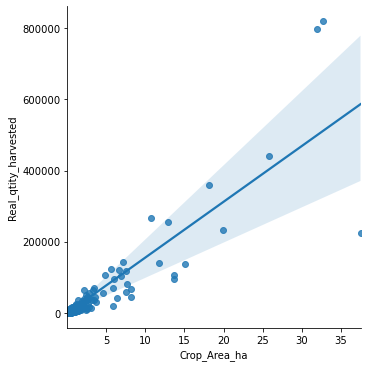

In [35]:
sns.lmplot(x='Crop_Area_ha',y='Real_qtity_harvested',data=Irish_df)

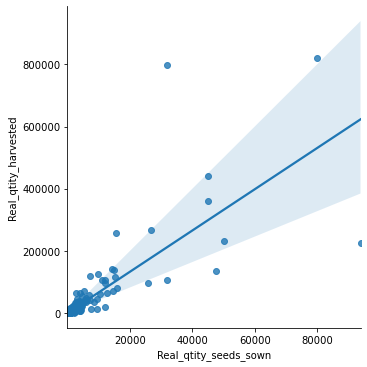

In [36]:
sns.lmplot(x='Real_qtity_seeds_sown',y='Real_qtity_harvested',data=Irish_df)

In [37]:
Irish_df.columns

Index(['Unnamed: 0', 'combined_id', 'Unique_id', 'Segment_id', 'Province_name',
       'District_name', 'Plot_number', 'Plot_Area_sqm', 'Cropping_system',
       'Number_of_crops', 'Crop_name', 'Crop_Area_sqm', 'Type_seeds_sown',
       'Season', 'Season1', 'CropGroup', 'Crop_Area_ha', 'Agri_year',
       'Qtity_seeds_sown', 'Total_qtity_harvested', 'Usage_organic_fertilizer',
       'Qtity_organic_fertiliser', 'Usage_inorganic_fertilizer',
       'inOrganic_fertiliser_type', 'inorganic_fertiliser_unity',
       'total_qtity_inorganic_feltiliser', 'Usage_pesticides',
       'Irrigation_use', 'Real_Qtity_inorganic', 'Yield', 'combined_id1',
       'Precipitation_season', 'Elevation', 'Minimum_temp', 'Maximum_temp',
       'Humidity', 'Average_Wind_speed', 'Windspeed', 'Radiation', 'Year',
       'district_id', 'Precipitation_year', 'crop_area_sq',
       'Precipitation_season_new', 'Humidity_new', 'Coeff_Square_meter',
       'Coeff_Seeds_meter', 'Coeff_fert_meter', 'Coeff_inorganic_met

In [38]:
Irish_data6=Irish_df.values

In [39]:
Qtity_organic_fertiliser1=[]
for organic in Irish_data6:
    area=organic[42]
    j=organic[-11]
   
    if (j>=1500000):
        Qtity_organic_fertiliser1.append(34500)
    elif (j>=1200000)&(j<1500000):
        Qtity_organic_fertiliser1.append(33700)
    elif (j>=1000000)&(j<1200000):
        Qtity_organic_fertiliser1.append(33100)
    elif (j>=250000)&(j<1000000):
        Qtity_organic_fertiliser1.append(33000)
    elif (j>=120000)&(j<250000):
        Qtity_organic_fertiliser1.append(32500)
    elif (j>=80000)&(j<120000):
        Qtity_organic_fertiliser1.append(31000)
    elif (j>=70000)&(j<80000):
        Qtity_organic_fertiliser1.append(30000)
    elif (j>=50000)&(j<70000):
        Qtity_organic_fertiliser1.append(29200)
    elif (j>=40000)&(j<50000):
        Qtity_organic_fertiliser1.append(28000)
    elif (j>=35000)&(j<40000):
        Qtity_organic_fertiliser1.append(27200)
    elif (j>=30000)&(j<35000):
        Qtity_organic_fertiliser1.append(26800)
    elif (j>=26000)&(j<30000):
        Qtity_organic_fertiliser1.append(24200)
    elif (j>=22000)&(j<26000):
        Qtity_organic_fertiliser1.append(22500)
    elif (j>=3000)&(j<22000):
        Qtity_organic_fertiliser1.append(22000)
        
    
    elif (j>=2000)&(j<3000):
        Qtity_organic_fertiliser1.append(3200)
    elif (j>=1500)&(j<2000):
        Qtity_organic_fertiliser1.append(3000)
    elif (j>=1000)&(j<1500):
        Qtity_organic_fertiliser1.append(2700)
    elif (j>=800)&(j<1000):
        Qtity_organic_fertiliser1.append(2500)
    elif (j>=800)&(j<1000):
        Qtity_organic_fertiliser1.append(2500)
    elif (j>=100)&(j<800):
        Qtity_organic_fertiliser1.append(2000)
    elif (j==0):
        Qtity_organic_fertiliser1.append(1000)
        
    else:
        Qtity_organic_fertiliser1.append(j)
   

In [40]:
Irish_df['Total_qtity_organic_fertiliser']=Qtity_organic_fertiliser1

In [41]:
Irish_df['Real_qtity_organic_fertiliser']=(Irish_df['Total_qtity_organic_fertiliser']*Irish_df['crop_area_sq'])/10000

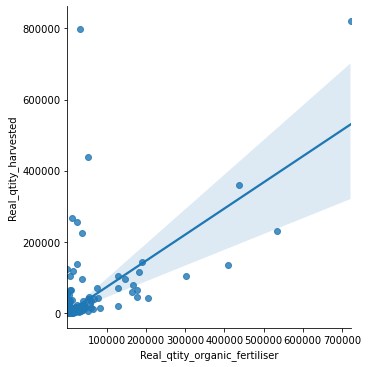

In [42]:
sns.lmplot(x='Real_qtity_organic_fertiliser',y='Real_qtity_harvested',data=Irish_df)

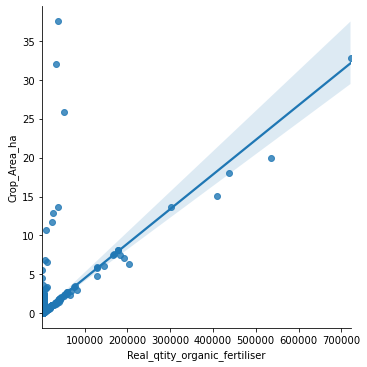

In [43]:
sns.lmplot(x='Real_qtity_organic_fertiliser',y='Crop_Area_ha',data=Irish_df)

# Working on inorganic fertiliser

In [44]:
Irish_df.columns

Index(['Unnamed: 0', 'combined_id', 'Unique_id', 'Segment_id', 'Province_name',
       'District_name', 'Plot_number', 'Plot_Area_sqm', 'Cropping_system',
       'Number_of_crops', 'Crop_name', 'Crop_Area_sqm', 'Type_seeds_sown',
       'Season', 'Season1', 'CropGroup', 'Crop_Area_ha', 'Agri_year',
       'Qtity_seeds_sown', 'Total_qtity_harvested', 'Usage_organic_fertilizer',
       'Qtity_organic_fertiliser', 'Usage_inorganic_fertilizer',
       'inOrganic_fertiliser_type', 'inorganic_fertiliser_unity',
       'total_qtity_inorganic_feltiliser', 'Usage_pesticides',
       'Irrigation_use', 'Real_Qtity_inorganic', 'Yield', 'combined_id1',
       'Precipitation_season', 'Elevation', 'Minimum_temp', 'Maximum_temp',
       'Humidity', 'Average_Wind_speed', 'Windspeed', 'Radiation', 'Year',
       'district_id', 'Precipitation_year', 'crop_area_sq',
       'Precipitation_season_new', 'Humidity_new', 'Coeff_Square_meter',
       'Coeff_Seeds_meter', 'Coeff_fert_meter', 'Coeff_inorganic_met

In [45]:
Irish_df['inOrganic_fertiliser_type'].value_counts()

NPK 17-17-17                                    3531
Urea                                            1555
NPK 17-17-17 (to specify)                         10
Liquid urea                                        2
Lliquid urea                                       2
Other inorganic     fertilizer(to   specify)       1
KCL/MOP                                            1
Name: inOrganic_fertiliser_type, dtype: int64

In [46]:
Irish_data7=Irish_df.values

In [47]:
Qtity_transf_npk=[]
for npk in Irish_data7:
    pk=npk[-8]
    area=npk[42]
    if pk>5000:
        Qtity_transf_npk.append(155)
    elif pk>=900:
        Qtity_transf_npk.append(500)
    elif (pk<=800) & (pk<900):
        Qtity_transf_npk.append(485)
    elif (pk<=700) & (pk<800):
        Qtity_transf_npk.append(480)
    elif (pk<=600) & (pk<700):
        Qtity_transf_npk.append(473)
    elif (pk<=550) & (pk<600):
        Qtity_transf_npk.append(465)
    elif (pk<=500) & (pk<550):
        Qtity_transf_npk.append(440)
    elif (pk<=480) & (pk<500):
        Qtity_transf_npk.append(420)
    elif (pk<=450) & (pk<480):
        Qtity_transf_npk.append(410)
    elif (pk<=400) & (pk<450):
        Qtity_transf_npk.append(400)
        
    elif (pk>=180):
        Qtity_transf_npk.append(180)
    elif (pk>=170)&(pk<180):
        Qtity_transf_npk.append(179)
    elif (pk>=150)&(pk<170):
        Qtity_transf_npk.append(177)
    elif (pk>=130)&(pk<150):
        Qtity_transf_npk.append(175)
    elif (pk>=100)&(pk<130):
        Qtity_transf_npk.append(174)
    elif (pk>=90)&(pk<100):
        Qtity_transf_npk.append(172)
    elif (pk>=80)&(pk<90):
        Qtity_transf_npk.append(170)
    elif (pk>=30)&(pk<80):
        Qtity_transf_npk.append(165)
    elif (pk>=5)&(pk<30):
        Qtity_transf_npk.append(160)
   
    elif ((pk==0)&(area<50)):
        Qtity_transf_npk.append(0)
    elif((pk==0)&((area>=50)&(area<100))):
        Qtity_transf_npk.append(100)
    elif((pk==0)&((area>=100)&(area<200))):
        Qtity_transf_npk.append(102)
    elif((pk==0)&((area>=200)&(area<300))):
        Qtity_transf_npk.append(104)
    elif((pk==0)&((area>=300)&(area<400))):
        Qtity_transf_npk.append(106)
    elif((pk==0)&((area>=400)&(area<600))):
        Qtity_transf_npk.append(107)
    elif((pk==0)&((area>=600)&(area<800))):
        Qtity_transf_npk.append(109)
    elif((pk==0)&((area>=800)&(area<900))):
        Qtity_transf_npk.append(110)
    elif((pk==0)&((area>=900)&(area<1000))):
        Qtity_transf_npk.append(115)
    elif((pk==0)&((area>=1000)&(area<1200))):
        Qtity_transf_npk.append(120)
    elif((pk==0)&((area>=1200)&(area<1250))):
        Qtity_transf_npk.append(125)
    elif((pk==0)&((area>=1250)&(area<1500))):
        Qtity_transf_npk.append(130)
    elif((pk==0)&((area>=1500)&(area<2000))):
        Qtity_transf_npk.append(140)
    elif((pk==0)&((area>=2000)&(area<3000))):
        Qtity_transf_npk.append(145)
    elif((pk==0)&((area>=3000)&(area<4000))):
        Qtity_transf_npk.append(148)
    elif((pk==0)&((area>=4000)&(area<5000))):
        Qtity_transf_npk.append(150)
    else:
        Qtity_transf_npk.append(pk)
    

In [48]:
Irish_df['Total_qtity_npk']=Qtity_transf_npk

In [49]:
Irish_df['Real_qtity_organic_npk']=(Irish_df['Total_qtity_npk']*Irish_df['crop_area_sq'])/10000

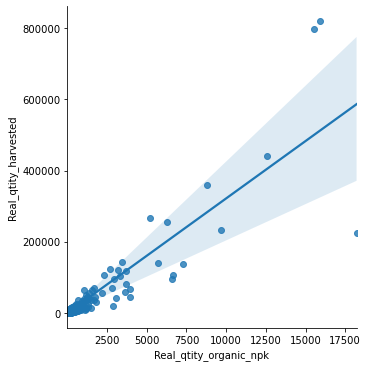

In [50]:
sns.lmplot(x='Real_qtity_organic_npk',y='Real_qtity_harvested',data=Irish_df)

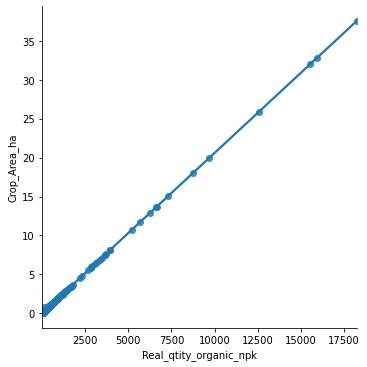

In [51]:
sns.lmplot(x='Real_qtity_organic_npk',y='Crop_Area_ha',data=Irish_df)

In [52]:
Irish_df.columns

Index(['Unnamed: 0', 'combined_id', 'Unique_id', 'Segment_id', 'Province_name',
       'District_name', 'Plot_number', 'Plot_Area_sqm', 'Cropping_system',
       'Number_of_crops', 'Crop_name', 'Crop_Area_sqm', 'Type_seeds_sown',
       'Season', 'Season1', 'CropGroup', 'Crop_Area_ha', 'Agri_year',
       'Qtity_seeds_sown', 'Total_qtity_harvested', 'Usage_organic_fertilizer',
       'Qtity_organic_fertiliser', 'Usage_inorganic_fertilizer',
       'inOrganic_fertiliser_type', 'inorganic_fertiliser_unity',
       'total_qtity_inorganic_feltiliser', 'Usage_pesticides',
       'Irrigation_use', 'Real_Qtity_inorganic', 'Yield', 'combined_id1',
       'Precipitation_season', 'Elevation', 'Minimum_temp', 'Maximum_temp',
       'Humidity', 'Average_Wind_speed', 'Windspeed', 'Radiation', 'Year',
       'district_id', 'Precipitation_year', 'crop_area_sq',
       'Precipitation_season_new', 'Humidity_new', 'Coeff_Square_meter',
       'Coeff_Seeds_meter', 'Coeff_fert_meter', 'Coeff_inorganic_met

In [53]:
Irish_data8=Irish_df.values

In [54]:
Qtity_transf_urea=[]
for urea in Irish_data:
    area=urea[42]
    ur=urea[-8]    
    if (pk>=180):
        Qtity_transf_urea.append(92)
    elif (pk>=170)&(pk<180):
        Qtity_transf_urea.append(90)
    elif (pk>=150)&(pk<170):
        Qtity_transf_urea.append(80)
    elif (pk>=130)&(pk<150):
        Qtity_transf_urea.append(87.75)
    elif (pk>=100)&(pk<130):
        Qtity_transf_urea.append(87)
    elif (pk>=90)&(pk<100):
        Qtity_transf_urea.append(86.5)
    elif (pk>=80)&(pk<90):
        Qtity_transf_urea.append(85)
    elif (pk>=30)&(pk<80):
        Qtity_transf_urea.append(82.5)
    elif (pk>=5)&(pk<30):
        Qtity_transf_urea.append(80)
    elif (pk<=5):
        Qtity_transf_npk.append(60)
    
    elif ((pk==0)&(area<50)):
        Qtity_transf_urea.append(0)
    elif((pk==0)&((area>=50)&(area<100))):
        Qtity_transf_urea.append(50)
    elif((pk==0)&((area>=100)&(area<200))):
        Qtity_transf_urea.append(51)
    elif((pk==0)&((area>=200)&(area<300))):
        Qtity_transf_urea.append(52)
    elif((pk==0)&((area>=300)&(area<400))):
        Qtity_transf_urea.append(52.5)
    elif((pk==0)&((area>=400)&(area<600))):
        Qtity_transf_urea.append(53)
    elif((pk==0)&((area>=600)&(area<800))):
        Qtity_transf_urea.append(54)
    elif((pk==0)&((area>=800)&(area<900))):
        Qtity_transf_urea.append(54.5)
    elif((pk==0)&((area>=900)&(area<1000))):
        Qtity_transf_urea.append(55)
    elif((pk==0)&((area>=1000)&(area<1200))):
        Qtity_transf_urea.append(55.25)
    elif((pk==0)&((area>=1200)&(area<1250))):
        Qtity_transf_urea.append(60)
    elif((pk==0)&((area>=1250)&(area<1500))):
        Qtity_transf_urea.append(62.5)
    elif((pk==0)&((area>=1500)&(area<2000))):
        Qtity_transf_urea.append(65)
    elif((pk==0)&((area>=2000)&(area<3000))):
        Qtity_transf_urea.append(70)
    elif((pk==0)&((area>=3000)&(area<4000))):
        Qtity_transf_urea.append(74)
    elif((pk==0)&((area>=4000)&(area<5000))):
        Qtity_transf_urea.append(75)
    elif (pk>=5000):
        Qtity_transf_urea.append(77.25)
    else:
        Qtity_transf_urea.append(ur)
    
    

In [55]:
Irish_df['Total_qtity_uree']=Qtity_transf_urea

In [56]:
Irish_df['Real_qtity_organic_urea']=(Irish_df['Total_qtity_uree']*Irish_df['crop_area_sq'])/10000

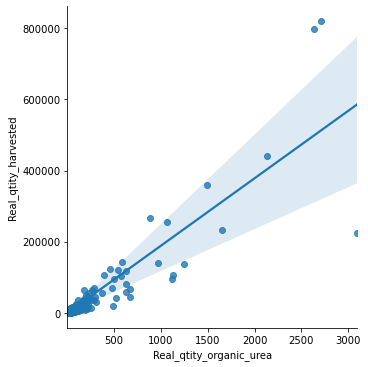

In [57]:
sns.lmplot(x='Real_qtity_organic_urea',y='Real_qtity_harvested',data=Irish_df)

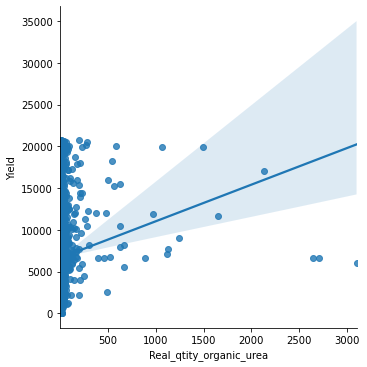

In [58]:
sns.lmplot(x='Real_qtity_organic_urea',y='Yield',data=Irish_df)

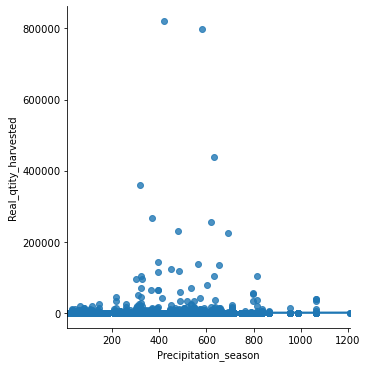

In [59]:
sns.lmplot(x='Precipitation_season',y='Real_qtity_harvested',data=Irish_df)

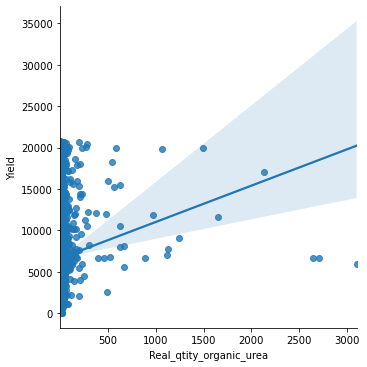

In [60]:
sns.lmplot(x='Real_qtity_organic_urea',y='Yield',data=Irish_df)

In [61]:
Irish_df.columns

Index(['Unnamed: 0', 'combined_id', 'Unique_id', 'Segment_id', 'Province_name',
       'District_name', 'Plot_number', 'Plot_Area_sqm', 'Cropping_system',
       'Number_of_crops', 'Crop_name', 'Crop_Area_sqm', 'Type_seeds_sown',
       'Season', 'Season1', 'CropGroup', 'Crop_Area_ha', 'Agri_year',
       'Qtity_seeds_sown', 'Total_qtity_harvested', 'Usage_organic_fertilizer',
       'Qtity_organic_fertiliser', 'Usage_inorganic_fertilizer',
       'inOrganic_fertiliser_type', 'inorganic_fertiliser_unity',
       'total_qtity_inorganic_feltiliser', 'Usage_pesticides',
       'Irrigation_use', 'Real_Qtity_inorganic', 'Yield', 'combined_id1',
       'Precipitation_season', 'Elevation', 'Minimum_temp', 'Maximum_temp',
       'Humidity', 'Average_Wind_speed', 'Windspeed', 'Radiation', 'Year',
       'district_id', 'Precipitation_year', 'crop_area_sq',
       'Precipitation_season_new', 'Humidity_new', 'Coeff_Square_meter',
       'Coeff_Seeds_meter', 'Coeff_fert_meter', 'Coeff_inorganic_met

In [62]:
Irish_df.to_csv("Irish_dframe.csv")

In [63]:
Irish_data1=Irish_df.values

In [64]:
Precipitation_new1=[]
for prec in Irish_data1:
    i=prec[-7]
    p=prec[-25]
    
    if (i>=60000):
        Precipitation_new1.append(870)
    elif (i>=58000) & (i<60000):
        Precipitation_new1.append(670)
    elif (i>=56000) & (i<58000):
        Precipitation_new1.append(650)
    elif (i>=54000) & (i<56000):
        Precipitation_new1.append(600)
    elif (i>=52000) & (i<54000):
        Precipitation_new1.append(550)
        
        
        
        
         
    elif (i>=50000) & (i<52000):
        Precipitation_new1.append(840)
        
    elif (i>=30000) & (i<50000):
        Precipitation_new1.append(800)
    elif (i>=25000) & (i<30000):
        Precipitation_new1.append(810)
    elif (i>=12000) & (i<25000):
        Precipitation_new1.append(800)
    elif (i>=8000) & (i<12000):
        Precipitation_new1.append(780)
    elif (i>=6000) & (i<8000):
        Precipitation_new1.append(770)
    elif (i>=4900) & (i<6000):
        Precipitation_new1.append(805)
    elif (i>=4700) & (i<4900):
        Precipitation_new1.append(760)
    elif (i>=4200) & (i<4700):
        Precipitation_new1.append(740)
    elif (i>=3700) & (i<4200):
        Precipitation_new1.append(720)
    elif (i>=3400) & (i<3700):
        Precipitation_new1.append(710)
    elif (i>=3000) & (i<3400):
        Precipitation_new1.append(700)
    elif (i>=2800) & (i<3000):
        Precipitation_new1.append(690)
    elif (i>=2400) & (i<2800):
        Precipitation_new1.append(680)
    elif (i>=2200) & (i<2400):
        Precipitation_new1.append(670)
    elif (i>=2100) & (i<2200):
        Precipitation_new1.append(665)
    elif (i>=1950) & (i<2100):
        Precipitation_new1.append(660)
    elif (i>=1850) & (i<1950):
        Precipitation_new1.append(650)
    elif (i>=1750) & (i<1850):
        Precipitation_new1.append(640)
    elif (i>=1650) & (i<1750):
        Precipitation_new1.append(630)
    elif (i>=1600) & (i<1650):
        Precipitation_new1.append(620)
    elif (i>=1500) & (i<1600):
        Precipitation_new1.append(610)
    elif (i>=1450) & (i<1500):
        Precipitation_new1.append(610)
    elif (i>=1400) & (i<1450):
        Precipitation_new1.append(600)
    elif (i>=1350) & (i<1400):
        Precipitation_new1.append(595)
    elif (i>=1300) & (i<1350):
        Precipitation_new1.append(590)
    elif (i>=1200) & (i<1300):
        Precipitation_new1.append(580)
    elif (i>=1150) & (i<1200):
        Precipitation_new1.append(570)
    elif (i>=1100) & (i<1150):
        Precipitation_new1.append(580)
    elif (i>=1000) & (i<1100):
        Precipitation_new1.append(560)
    elif (i>=950) & (i<1000):
        Precipitation_new1.append(550)
    elif (i>=900) & (i<950):
        Precipitation_new1.append(540)
    elif (i>=900) & (i<950):
        Precipitation_new1.append(535)
    
        
    elif i<20:
        Precipitation_new1.append(250)
    elif (i>=20) & (i<100):
        Precipitation_new1.append(280)
    elif (i>=100) & (i<200):
        Precipitation_new1.append(320)
    elif (i>=200) & (i<300):
        Precipitation_new1.append(340)
    elif (i>=300) & (i<400):
        Precipitation_new1.append(370)
    elif (i>=400) & (i<500):
        Precipitation_new1.append(400)
    elif (i>=500) & (i<550):
        Precipitation_new1.append(600)
    elif (i>=550) & (i<600):
        Precipitation_new1.append(610)
    elif (i>=600) & (i<650):
        Precipitation_new1.append(600)
    elif (i>=650) & (i<680):
        Precipitation_new1.append(640)
        
        
    elif (i>=680) & (i<700):
        Precipitation_new1.append(630)
    elif (i>=700) & (i<710):
        Precipitation_new1.append(640)
    elif (i>=710) & (i<720):
        Precipitation_new1.append(650)
    elif (i>=720) & (i<740):
        Precipitation_new1.append(660)
    elif (i>=740) & (i<750):
        Precipitation_new1.append(670)
        
       
    else:
        Precipitation_new1.append(p)
    
        
        

In [65]:
Irish_df['Precipitation_new_one']=Precipitation_new1

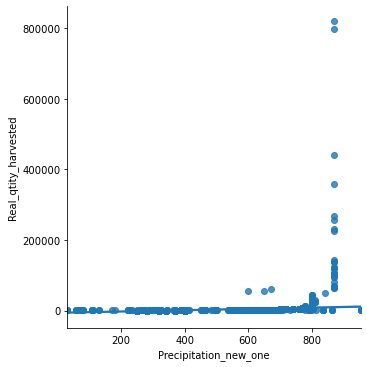

In [66]:
sns.lmplot(x='Precipitation_new_one',y='Real_qtity_harvested',data=Irish_df)

In [67]:
Irish_df.columns

Index(['Unnamed: 0', 'combined_id', 'Unique_id', 'Segment_id', 'Province_name',
       'District_name', 'Plot_number', 'Plot_Area_sqm', 'Cropping_system',
       'Number_of_crops', 'Crop_name', 'Crop_Area_sqm', 'Type_seeds_sown',
       'Season', 'Season1', 'CropGroup', 'Crop_Area_ha', 'Agri_year',
       'Qtity_seeds_sown', 'Total_qtity_harvested', 'Usage_organic_fertilizer',
       'Qtity_organic_fertiliser', 'Usage_inorganic_fertilizer',
       'inOrganic_fertiliser_type', 'inorganic_fertiliser_unity',
       'total_qtity_inorganic_feltiliser', 'Usage_pesticides',
       'Irrigation_use', 'Real_Qtity_inorganic', 'Yield', 'combined_id1',
       'Precipitation_season', 'Elevation', 'Minimum_temp', 'Maximum_temp',
       'Humidity', 'Average_Wind_speed', 'Windspeed', 'Radiation', 'Year',
       'district_id', 'Precipitation_year', 'crop_area_sq',
       'Precipitation_season_new', 'Humidity_new', 'Coeff_Square_meter',
       'Coeff_Seeds_meter', 'Coeff_fert_meter', 'Coeff_inorganic_met

In [68]:
Irish_data2=Irish_df.values

In [69]:
radiation=[]
for solar in Irish_data2:
    i=solar[-8]
    r=solar[-31]
    
    if (i>=60000):
        radiation.append(1200)
         
    elif (i>=50000) & (i<1000):
        radiation.append(980)
        
    elif (i>=30000) & (i<50000):
        radiation.append(950)
    elif (i>=25000) & (i<30000):
        radiation.append(920)
    elif (i>=12000) & (i<25000):
        radiation.append(900)
    elif (i>=8000) & (i<12000):
        radiation.append(900)
    elif (i>=6000) & (i<8000):
        radiation.append(890)
    elif (i>=4900) & (i<6000):
        radiation.append(880)
    elif (i>=4700) & (i<4900):
        radiation.append(870)
    elif (i>=4200) & (i<4700):
        radiation.append(850)
    elif (i>=3700) & (i<4200):
        radiation.append(830)
    elif (i>=3400) & (i<3700):
        radiation.append(820)
    elif (i>=3000) & (i<3400):
        radiation.append(810)
    elif (i>=2800) & (i<3000):
        radiation.append(800)
    elif (i>=2400) & (i<2800):
        radiation.append(780)
    elif (i>=2200) & (i<2400):
        radiation.append(770)
    elif (i>=2100) & (i<2200):
        radiation.append(755)
    elif (i>=1950) & (i<2100):
        radiation.append(740)
    elif (i>=1850) & (i<1950):
        radiation.append(730)
    elif (i>=1750) & (i<1850):
        radiation.append(720)
    elif (i>=1650) & (i<1750):
        radiation.append(710)
    elif (i>=1600) & (i<1650):
        radiation.append(690)
    elif (i>=1500) & (i<1600):
        radiation.append(680)
    elif (i>=1450) & (i<1500):
        radiation.append(640)
    elif (i>=1400) & (i<1450):
        radiation.append(600)
    elif (i>=1350) & (i<1400):
        radiation.append(595)
    elif (i>=1300) & (i<1350):
        radiation.append(590)
    elif (i>=1200) & (i<1300):
        radiation.append(580)
    elif (i>=1150) & (i<1200):
        radiation.append(570)
    elif (i>=1100) & (i<1150):
        radiation.append(580)
    elif (i>=1000) & (i<1100):
        radiation.append(560)
    elif (i>=950) & (i<1000):
        radiation.append(550)
    elif (i>=900) & (i<950):
        radiation.append(540)
    elif (i>=900) & (i<950):
        radiation.append(535)
    
        
    elif i<20:
        radiation.append(250)
    elif (i>=20) & (i<100):
        radiation.append(280)
    elif (i>=100) & (i<200):
        radiation.append(320)
    elif (i>=200) & (i<300):
        radiation.append(340)
    elif (i>=300) & (i<400):
        radiation.append(370)
    elif (i>=400) & (i<500):
        radiation.append(400)
    elif (i>=500) & (i<550):
        radiation.append(450)
    elif (i>=550) & (i<600):
        radiation.append(480)
    elif (i>=600) & (i<650):
        radiation.append(490)
    elif (i>=650) & (i<680):
        radiation.append(500)
    elif i<0:
        radiation.append(200)
    elif (i>=-2500) & (i<-2000):
        radiation.append(150)
    elif (i>=-2000) & (i<-1500):
        radiation.append(120)
    elif (i>=-1500) & (i<-500):
        radiation.append(100)
    
    else:
        radiation.append(r)
    
        
        
        

In [70]:
Irish_df['Radion_new']=radiation

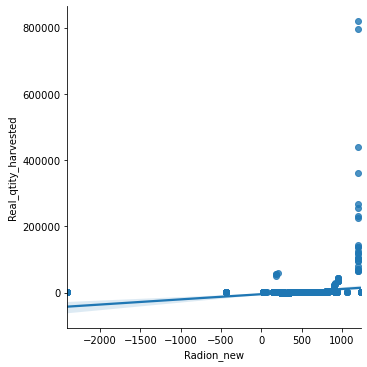

In [71]:
sns.lmplot(x='Radion_new',y='Real_qtity_harvested', data=Irish_df)

<AxesSubplot:>

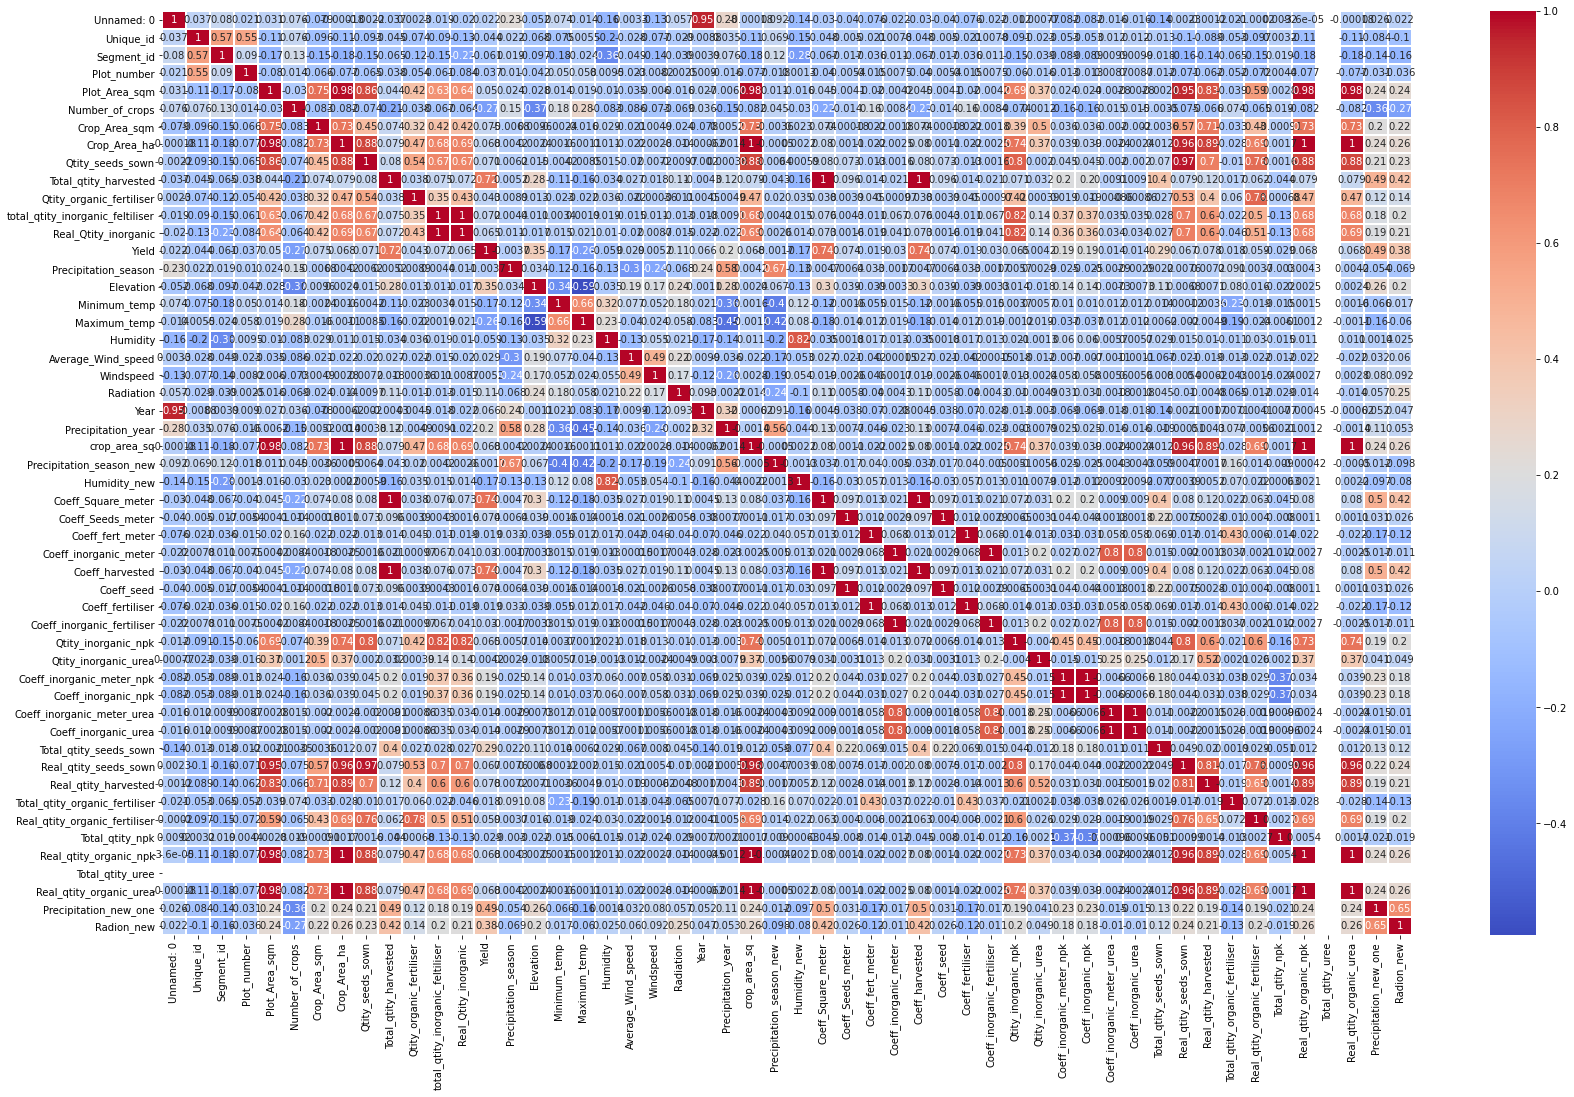

In [72]:
#plot total number of cce of each crops measured per district
plt.figure(figsize=(28,17))
sns.heatmap(Irish_df.corr(),cmap='coolwarm', annot=True, linecolor='white',linewidths=1)

In [73]:
Irish_df.to_csv("Irish_final_data.csv")

In [74]:
Irish_df.columns

Index(['Unnamed: 0', 'combined_id', 'Unique_id', 'Segment_id', 'Province_name',
       'District_name', 'Plot_number', 'Plot_Area_sqm', 'Cropping_system',
       'Number_of_crops', 'Crop_name', 'Crop_Area_sqm', 'Type_seeds_sown',
       'Season', 'Season1', 'CropGroup', 'Crop_Area_ha', 'Agri_year',
       'Qtity_seeds_sown', 'Total_qtity_harvested', 'Usage_organic_fertilizer',
       'Qtity_organic_fertiliser', 'Usage_inorganic_fertilizer',
       'inOrganic_fertiliser_type', 'inorganic_fertiliser_unity',
       'total_qtity_inorganic_feltiliser', 'Usage_pesticides',
       'Irrigation_use', 'Real_Qtity_inorganic', 'Yield', 'combined_id1',
       'Precipitation_season', 'Elevation', 'Minimum_temp', 'Maximum_temp',
       'Humidity', 'Average_Wind_speed', 'Windspeed', 'Radiation', 'Year',
       'district_id', 'Precipitation_year', 'crop_area_sq',
       'Precipitation_season_new', 'Humidity_new', 'Coeff_Square_meter',
       'Coeff_Seeds_meter', 'Coeff_fert_meter', 'Coeff_inorganic_met

In [75]:
district_Areagrp=pd.DataFrame(Irish_df.groupby('District_name')['Crop_Area_ha'].mean()).reset_index()
district_Areagrp.head()

District_name  Crop_Area_ha
0      BUGESERA      0.287152
1        BURERA      0.060297
2       GAKENKE      0.024845
3        GASABO      0.041460
4       GATSIBO      0.071634

In [76]:
Irish_district_year_yield1=pd.DataFrame(Irish_df.groupby(['District_name','Agri_year'])['Yield'].mean())
Irish_district_year_yield1=Irish_district_year_yield1.reset_index()
Irish_district_year_yield1.head()

District_name  Agri_year        Yield
0      BUGESERA  2016_2017  3717.948617
1      BUGESERA  2017_2018  2246.764316
2      BUGESERA  2018_2019  2730.722474
3        BURERA  2016_2017  7186.432214
4        BURERA  2017_2018  8560.912433

In [77]:
Irish_district_year_yield_pvt=Irish_district_year_yield1.pivot(index='District_name',columns='Agri_year', values='Yield')
Irish_district_year_yield_pvt=Irish_district_year_yield_pvt.reset_index()
Irish_district_year_yield_pvt.head()

Agri_year District_name    2016_2017    2017_2018    2018_2019
0              BUGESERA  3717.948617  2246.764316  2730.722474
1                BURERA  7186.432214  8560.912433  9773.709247
2               GAKENKE  4939.256369  5122.653711  6498.175298
3                GASABO  6251.398402  5213.837153  4572.594566
4               GATSIBO  4363.135365  4025.619461  4572.066328

In [78]:
df_merged_area_yield=pd.merge(district_Areagrp,Irish_district_year_yield_pvt, on='District_name')
df_merged_area_yield.head()

District_name  Crop_Area_ha    2016_2017    2017_2018    2018_2019
0      BUGESERA      0.287152  3717.948617  2246.764316  2730.722474
1        BURERA      0.060297  7186.432214  8560.912433  9773.709247
2       GAKENKE      0.024845  4939.256369  5122.653711  6498.175298
3        GASABO      0.041460  6251.398402  5213.837153  4572.594566
4       GATSIBO      0.071634  4363.135365  4025.619461  4572.066328

In [79]:
df_merged_area_yield.sort_values(by='Crop_Area_ha', inplace=True)

In [80]:
#Working on smothing lines
smothingtrace10= {'type' : 'scatter',
             'x' : df_merged_area_yield['Crop_Area_ha'],
             'y' : df_merged_area_yield['2016_2017'],
             'name' : '2016_2017',
             'mode' : 'lines+markers',
             'line' : {'smoothing' : 0.8,
                        'shape' : 'spline'}}

smothingtrace20= {'type' : 'scatter',
             'x' : df_merged_area_yield['Crop_Area_ha'],
             'y' : df_merged_area_yield['2017_2018'],
             'name' : '2017_2018',
             'mode' : 'lines+markers',
         'line' : {'smoothing' : 1.3,
                        'shape' : 'spline'}}

smothingtrace30= {'type' : 'scatter',
             'x' : df_merged_area_yield['Crop_Area_ha'],
             'y' : df_merged_area_yield['2018_2019'],
             'name' : '2018_2019',
             'mode' : 'lines+markers',
                 'line' : {'smoothing' : 1.3,
                        'shape' : 'spline'}}


In [81]:
data=Data([smothingtrace10,smothingtrace20,smothingtrace30])
layout = {'title' : 'Irish Potatoes yield from 2017 - 2019',
         'xaxis' : {'title' : 'Crop area in ha'},
         'yaxis' : {'title' : 'Irish potatoes yield'} 
         }

C:\Users\Jean Damascene\anaconda3\lib\site-packages\plotly\graph_objs\_deprecations.py:31: DeprecationWarning:

plotly.graph_objs.Data is deprecated.
Please replace it with a list or tuple of instances of the following types
  - plotly.graph_objs.Scatter
  - plotly.graph_objs.Bar
  - plotly.graph_objs.Area
  - plotly.graph_objs.Histogram
  - etc.




In [82]:
fig = Figure(data = data, layout = layout)
pyo.iplot(fig)

In [83]:
#Working on smothing lines
smothingtrace1= {'type' : 'scatter',
             'x' : df_merged_area_yield['District_name'],
             'y' : df_merged_area_yield['2016_2017'],
             'name' : '2016_2017',
             'mode' : 'lines+markers',
             'line' : {'smoothing' : 0.8,
                        'shape' : 'spline'}}

smothingtrace2= {'type' : 'scatter',
             'x' : df_merged_area_yield['District_name'],
             'y' : df_merged_area_yield['2017_2018'],
             'name' : '2017_2018',
             'mode' : 'lines+markers',
         'line' : {'smoothing' : 1.3,
                        'shape' : 'spline'}}

smothingtrace3= {'type' : 'scatter',
             'x' : df_merged_area_yield['District_name'],
             'y' : df_merged_area_yield['2018_2019'],
             'name' : '2018_2019',
             'mode' : 'lines+markers',
                 'line' : {'smoothing' : 1.3,
                        'shape' : 'spline'}}


In [84]:
data=Data([smothingtrace1,smothingtrace2,smothingtrace3])
layout = {'title' : 'Irish Potatoes yield Distribution from 2017 - 2019',
         'xaxis' : {'title' : 'District name'},
         'yaxis' : {'title' : 'Irish potatoes yield'} 
         }

In [85]:
fig = Figure(data = data, layout = layout)
pyo.iplot(fig)

In [86]:
#grouping yield per season in every district
Irish_district_season=pd.DataFrame(Irish_df.groupby(['District_name','Season1'])['Yield'].mean()).reset_index()
Irish_district_season.head()

District_name      Season1        Yield
0      BUGESERA  SeasonA2018  2316.821660
1      BUGESERA  SeasonA2019  2869.348214
2      BUGESERA  SeasonB2019  2661.409603
3      BUGESERA  SeasonC2017  3717.948617
4      BUGESERA  SeasonC2018  2036.592284

In [87]:
Irish_district_season.isnull().sum()

District_name    0
Season1          0
Yield            0
dtype: int64

In [88]:
#Grouping the maize yield in every season per district
Irish_district_season_pvt=Irish_district_season.pivot(index='District_name',columns='Season1', values='Yield').fillna("").reset_index()
Irish_district_season_pvt.head()

Season1 District_name SeasonA2017 SeasonA2018  SeasonA2019 SeasonB2017  \
0            BUGESERA                 2316.82  2869.348214               
1              BURERA      6458.4     7869.99  9912.984996      6783.9   
2             GAKENKE     5437.55     5923.25  6755.096721     3150.51   
3              GASABO     6952.75     7767.03  5390.685469     5326.89   
4             GATSIBO     4306.46     6411.02  4587.655095     4360.44   

Season1 SeasonB2018  SeasonB2019 SeasonC2017 SeasonC2018 SeasonC2019  
0                    2661.409603     3717.95     2036.59              
1           8540.89  9472.403800     8390.55     9666.22     10366.8  
2           4042.55  5922.377060     3802.08     6142.83        9362  
3           4192.56  3594.442400                                      
4           2789.07  4496.686898     4939.22     7279.29     5708.73

In [89]:
#grouping yield per season in every district
Irish_district_season=pd.DataFrame(Irish_df.groupby(['District_name','Season1'])['Yield'].mean()).reset_index()
Irish_district_season.head()

District_name      Season1        Yield
0      BUGESERA  SeasonA2018  2316.821660
1      BUGESERA  SeasonA2019  2869.348214
2      BUGESERA  SeasonB2019  2661.409603
3      BUGESERA  SeasonC2017  3717.948617
4      BUGESERA  SeasonC2018  2036.592284

In [90]:
#Grouping the maize yield in every season per district
Irish_district_season_pvt=Irish_district_season.pivot(index='District_name',columns='Season1', values='Yield').fillna(0)
Irish_district_season_pvt=Irish_district_season_pvt.reset_index()
Irish_district_season_pvt.head()

Season1 District_name  SeasonA2017  SeasonA2018  SeasonA2019  SeasonB2017  \
0            BUGESERA     0.000000  2316.821660  2869.348214     0.000000   
1              BURERA  6458.401224  7869.993328  9912.984996  6783.899430   
2             GAKENKE  5437.551185  5923.250259  6755.096721  3150.511112   
3              GASABO  6952.750520  7767.030964  5390.685469  5326.888792   
4             GATSIBO  4306.460447  6411.015844  4587.655095  4360.444132   

Season1  SeasonB2018  SeasonB2019  SeasonC2017  SeasonC2018   SeasonC2019  
0           0.000000  2661.409603  3717.948617  2036.592284      0.000000  
1        8540.892134  9472.403800  8390.551957  9666.221142  10366.838260  
2        4042.550769  5922.377060  3802.079126  6142.827850   9362.000072  
3        4192.559629  3594.442400     0.000000     0.000000      0.000000  
4        2789.070776  4496.686898  4939.224352  7279.290867   5708.730025

In [91]:
Irish_district_season_pvt.to_excel("Irish_district_season_pvt.xlsx")

In [92]:
pwd

'C:\\Users\\Jean Damascene\\Desktop\\PYTHON PROJECT\\SHORT_COURSES\\DASHBOARD\\My project\\Meteo Data\\FINAL DATA'

In [93]:
Irish_df['Season1'].value_counts()

SeasonA2019    1928
SeasonB2019    1763
SeasonA2017    1459
SeasonB2018    1019
SeasonB2017    1001
SeasonA2018     950
SeasonC2017     484
SeasonC2018     371
SeasonC2019     321
Name: Season1, dtype: int64

In [94]:
#Working on smothing lines +markers
smothingtrace13= {'type' : 'scatter',
             'x' : Irish_district_season_pvt['District_name'],
             'y' : Irish_district_season_pvt['SeasonA2017'],
             'name' : 'SeasonA2017',
             'mode' : 'lines+markers',
             'line' : {'smoothing' : 0.8,
                        'shape' : 'spline'}}

smothingtrace23= {'type' : 'scatter',
             'x' : Irish_district_season_pvt['District_name'],
             'y' : Irish_district_season_pvt['SeasonA2018'],
             'name' : 'SeasonA2018',
             'mode' : 'lines+markers',
         'line' : {'smoothing' : 1.3,
                        'shape' : 'spline'}}

smothingtrace33= {'type' : 'scatter',
             'x' : Irish_district_season_pvt['District_name'],
             'y' : Irish_district_season_pvt['SeasonA2019'],
             'name' : 'SeasonA2019',
             'mode' : 'lines+markers',
                 'line' : {'smoothing' : 1.3,
                        'shape' : 'spline'}}

smothingtrace43= {'type' : 'scatter',
             'x' : Irish_district_season_pvt['District_name'],
             'y' : Irish_district_season_pvt['SeasonB2017'],
             'name' : 'SeasonB2017',
             'mode' : 'lines+markers',
             'line' : {'smoothing' : 0.8,
                        'shape' : 'spline'}}

smothingtrace53= {'type' : 'scatter',
             'x' : Irish_district_season_pvt['District_name'],
             'y' : Irish_district_season_pvt['SeasonB2018'],
             'name' : 'SeasonB2018',
             'mode' : 'lines+markers',
         'line' : {'smoothing' : 1.3,
                        'shape' : 'spline'}}

smothingtrace63= {'type' : 'scatter',
             'x' : Irish_district_season_pvt['District_name'],
             'y' : Irish_district_season_pvt['SeasonB2019'],
             'name' : 'SeasonB2019',
             'mode' : 'lines+markers',
                 'line' : {'smoothing' : 1.3,
                        'shape' : 'spline'}}
smothingtrace73= {'type' : 'scatter',
             'x' : Irish_district_season_pvt['District_name'],
             'y' : Irish_district_season_pvt['SeasonC2017'],
             'name' : 'SeasonC2017',
             'mode' : 'lines+markers',
             'line' : {'smoothing' : 0.8,
                        'shape' : 'spline'}}

smothingtrace83= {'type' : 'scatter',
             'x' : Irish_district_season_pvt['District_name'],
             'y' : Irish_district_season_pvt['SeasonC2018'],
             'name' : 'SeasonC2018',
             'mode' : 'lines+markers',
         'line' : {'smoothing' : 1.3,
                        'shape' : 'spline'}}

smothingtrace93= {'type' : 'scatter',
             'x' : Irish_district_season_pvt['District_name'],
             'y' : Irish_district_season_pvt['SeasonC2019'],
             'name' : 'SeasonC2019',
             'mode' : 'lines+markers',
                 'line' : {'smoothing' : 1.3,
                        'shape' : 'spline'}}




In [95]:
data4=Data([smothingtrace13,smothingtrace23,smothingtrace33,smothingtrace43,smothingtrace53,
          smothingtrace63,smothingtrace73,smothingtrace83,smothingtrace93])

layout4 = {'title' : 'Beans yield per season in every district',
         'xaxis' : {'title' : 'AgricultureSeason'},
         'yaxis' : {'title' : 'Crop yield'}}

C:\Users\Jean Damascene\anaconda3\lib\site-packages\plotly\graph_objs\_deprecations.py:31: DeprecationWarning:

plotly.graph_objs.Data is deprecated.
Please replace it with a list or tuple of instances of the following types
  - plotly.graph_objs.Scatter
  - plotly.graph_objs.Bar
  - plotly.graph_objs.Area
  - plotly.graph_objs.Histogram
  - etc.




In [96]:
fig = Figure(data = data4, layout = layout4)
pyo.iplot(fig)

In [97]:
Irish_district_year=pd.DataFrame(Irish_df.groupby(['District_name','Agri_year'])['Yield'].mean()).reset_index()
Irish_district_year.head()

District_name  Agri_year        Yield
0      BUGESERA  2016_2017  3717.948617
1      BUGESERA  2017_2018  2246.764316
2      BUGESERA  2018_2019  2730.722474
3        BURERA  2016_2017  7186.432214
4        BURERA  2017_2018  8560.912433

In [98]:
Agri_years = list(Irish_district_year['Agri_year'].unique())
Agri_years

['2016_2017', '2017_2018', '2018_2019']

In [99]:
traces = []
for y in Agri_years:
    traces.append({'type' : 'bar',
                  'name' : str(y),
                  'x' : Irish_district_year.loc[Irish_district_year['Agri_year'] == y, 'District_name'],
                  'y' : Irish_district_year.loc[Irish_district_year['Agri_year'] == y, 'Yield']})
    
layout = {'title' : " Irish potatoes yield by Agriculture year,in all districts",
         'xaxis' : {'title' : 'District_names'},
         'yaxis' : {'title' : ' Irish potatoes yield'},
         'annotations' : [{
                          'font' : {'color' : 'grey',
                                   'size' : 10},
                          'xref' : 'paper',
                          'yref' : 'paper',
                          'x' : 0,
                          'y' : -0.2,
                          'showarrow' : False}]}
fig = {'data' : traces, 'layout' : layout}
pyo.iplot(fig)

In [100]:
Irish_croping_system=pd.DataFrame(Irish_df.groupby('Cropping_system')['Yield'].mean())
Irish_croping_system

Yield
Cropping_system             
Mixed            5878.353990
Pure             8116.092949

In [101]:
Irish = {'type' : 'bar',
                     'x' :Irish_croping_system.index,
                     'y' :Irish_croping_system['Yield']}

layout = {'title' : "       Irish potatoes yield based on cropping system",
         'xaxis' : {'title' : 'cropping system'},
         'yaxis' : {'title' : 'Paddy rice yield'},
         'annotations' : [{
                          'font' : {'color' : 'Indianred',
                                   'size' : 10},
                          'xref' : 'paper',
                          'yref' : 'paper',
                          'x' : 0,
                          'y' : -0.2,
                          'showarrow' : False}]}
fig = {'data' : [Irish],
      'layout' : layout}
pyo.iplot(fig)

In [102]:
Irish_croping_system1=pd.DataFrame(Irish_df.groupby(['Agri_year','Cropping_system'])['Yield'].mean()).reset_index()
Irish_croping_system1

Agri_year Cropping_system        Yield
0  2016_2017           Mixed  5312.539706
1  2016_2017            Pure  7542.049316
2  2017_2018           Mixed  5973.551490
3  2017_2018            Pure  8186.138660
4  2018_2019           Mixed  6196.753522
5  2018_2019            Pure  8605.498132

In [103]:
agryear=list(Irish_croping_system1['Agri_year'].unique())
agryear

['2016_2017', '2017_2018', '2018_2019']

In [104]:
traces50=[]

for a in agryear:
    traces50.append({'type' : 'bar',
                  'name' : a,
                  'x' : Irish_croping_system1.loc[Irish_croping_system1['Agri_year'] == a, 'Cropping_system'],
                  'y' : Irish_croping_system1.loc[Irish_croping_system1['Agri_year'] == a, 'Yield']})
    
layout = {'title' : " Irish potatoes yield by cropping system from agriculture 2017 to  2019",
         'xaxis' : {'title' : 'Cropping System'},
         'yaxis' : {'title' : 'Irish potatoes yield'},
         'annotations' : [{
                          'font' : {'color' : 'grey',
                                   'size' : 10},
                          'xref' : 'paper',
                          'yref' : 'paper',
                          'x' : 0,
                          'y' : -0.2,
                          'showarrow' : False}]}
fig = {'data' : traces50, 'layout' : layout}
pyo.iplot(fig)

In [105]:
Irish_season=pd.DataFrame(Irish_df.groupby('Season1')['Yield'].mean()).reset_index()
Irish_season.head()

Season1        Yield
0  SeasonA2017  5926.454455
1  SeasonA2018  7002.797303
2  SeasonA2019  6540.922203
3  SeasonB2017  5807.637921
4  SeasonB2018  6062.468153

In [106]:
Irish= {'type' : 'bar',
                     'x' :Irish_season.Season1,
                     'y' : Irish_season['Yield'],
       'marker' : {'color' : 'indianred',
                                'line' : {'color' : '#333',
                                          'width' : 3}},
                     'opacity' : 0.5}

layout = {'title' : " Irish Potatoes yield by Season from 2017 to 2019",
         'xaxis' : {'title' : 'Season'},
         'yaxis' : {'title' : 'crop yield'},
         'annotations' : [{
                          'font' : {'color' : 'lightblue',
                                   'size' : 10},
                          'xref' : 'paper',
                          'yref' : 'paper',
                          'x' : 0,
                          'y' : -0.2,
                          'showarrow' : False}]}
fig = {'data' : [Irish],
      'layout' : layout}
pyo.iplot(fig)

# Working on Environment factors

<AxesSubplot:>

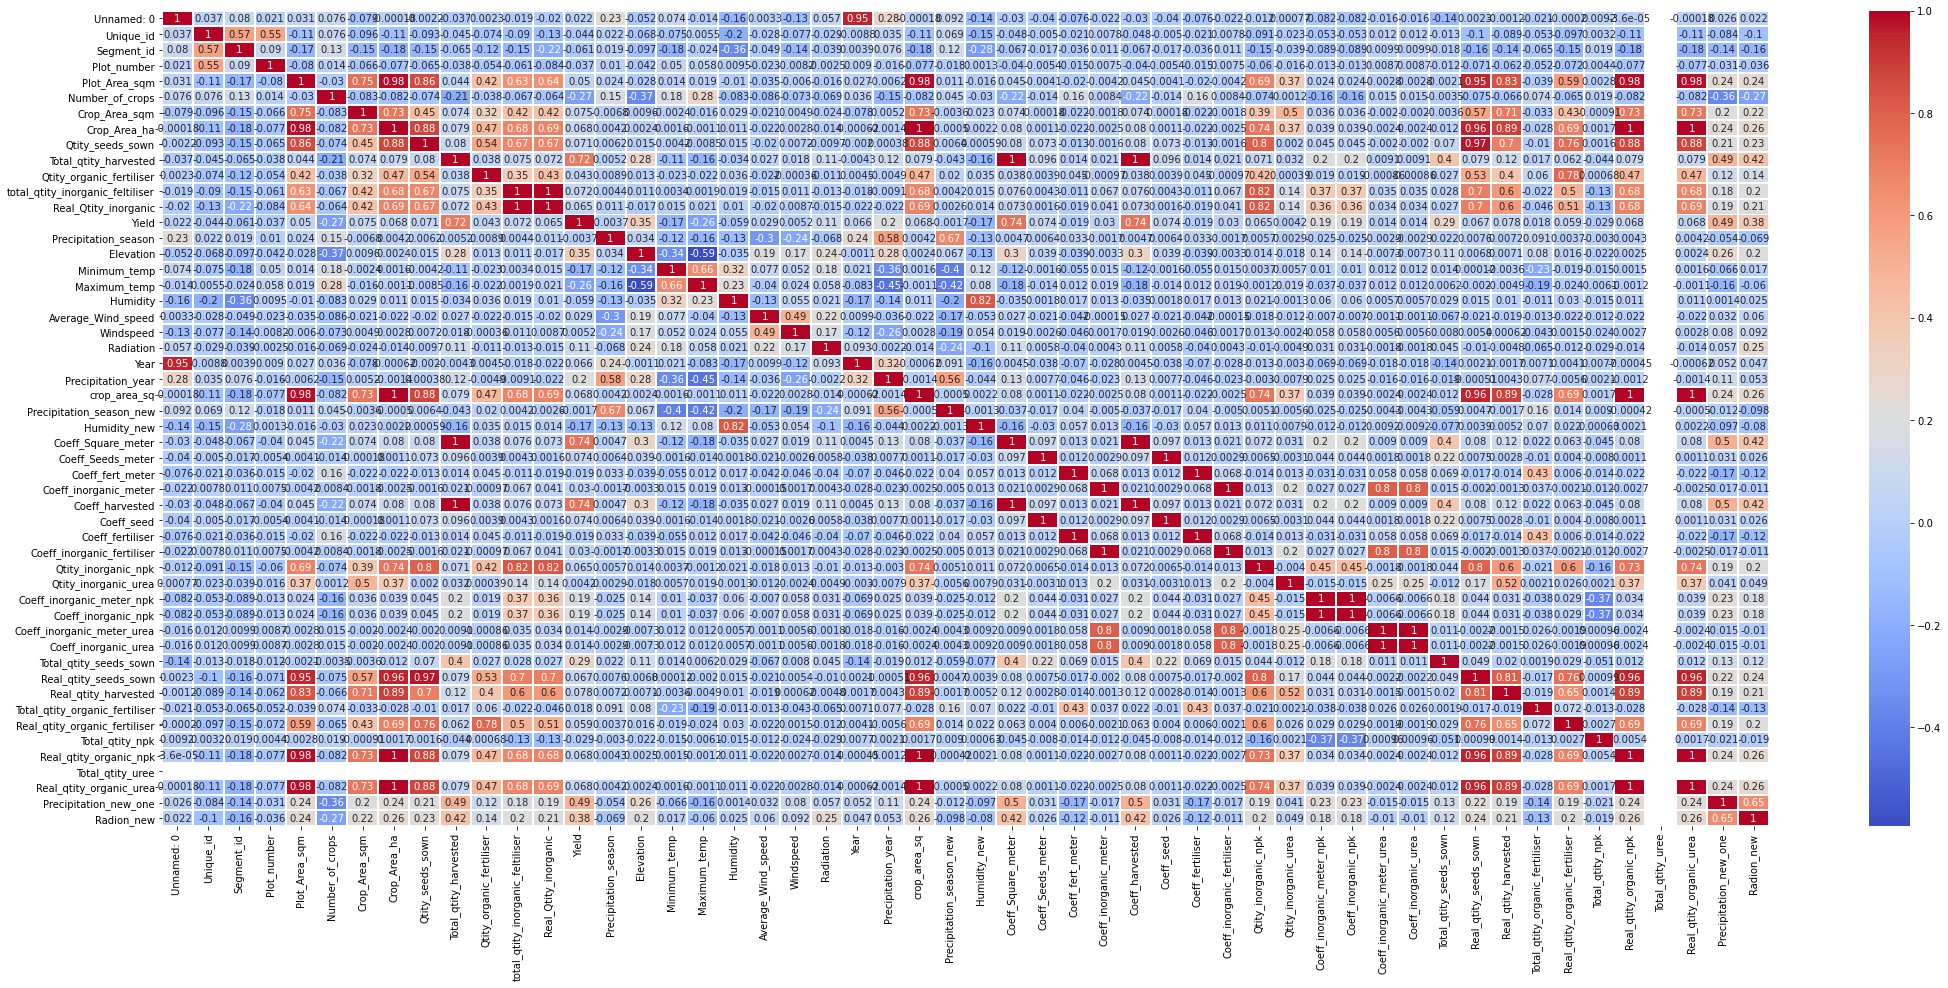

In [107]:
#plot total number of cce of each crops measured per district
plt.figure(figsize=(36,15))
sns.heatmap(Irish_df.corr(),cmap='coolwarm', annot=True, linecolor='white',linewidths=1)

In [108]:
Irish_df.columns

Index(['Unnamed: 0', 'combined_id', 'Unique_id', 'Segment_id', 'Province_name',
       'District_name', 'Plot_number', 'Plot_Area_sqm', 'Cropping_system',
       'Number_of_crops', 'Crop_name', 'Crop_Area_sqm', 'Type_seeds_sown',
       'Season', 'Season1', 'CropGroup', 'Crop_Area_ha', 'Agri_year',
       'Qtity_seeds_sown', 'Total_qtity_harvested', 'Usage_organic_fertilizer',
       'Qtity_organic_fertiliser', 'Usage_inorganic_fertilizer',
       'inOrganic_fertiliser_type', 'inorganic_fertiliser_unity',
       'total_qtity_inorganic_feltiliser', 'Usage_pesticides',
       'Irrigation_use', 'Real_Qtity_inorganic', 'Yield', 'combined_id1',
       'Precipitation_season', 'Elevation', 'Minimum_temp', 'Maximum_temp',
       'Humidity', 'Average_Wind_speed', 'Windspeed', 'Radiation', 'Year',
       'district_id', 'Precipitation_year', 'crop_area_sq',
       'Precipitation_season_new', 'Humidity_new', 'Coeff_Square_meter',
       'Coeff_Seeds_meter', 'Coeff_fert_meter', 'Coeff_inorganic_met

In [109]:
#sns.lmplot(x='Total_qtity_harvested',y='Yield',data=Irish_df)

In [110]:
#Irish_df['log_tpmax']=np.exp(Irish_df['TMPMAX'])
#Irish_df['log_yield']=np.exp(Irish_df['Yield'])
#sns.lmplot(x='log_tpmax',y='log_yield',data=Irish_df)

In [111]:
#Irish_df['Yield'].describe()

In [112]:
#Irish_df[Irish_df['Yield']==18000]

In [113]:
Irish_dframe=Irish_df[['Precipitation_new_one', 'Radion_new','Real_qtity_organic_urea',
 'Real_qtity_organic_npk','Real_qtity_organic_fertiliser','Real_qtity_seeds_sown',
 'Crop_Area_ha','Cropping_system','Number_of_crops',
 'Type_seeds_sown','Usage_pesticides','Irrigation_use','Elevation', 'Minimum_temp', 'Maximum_temp',
       'Humidity', 'Average_Wind_speed', 'Windspeed','Real_qtity_harvested']]
Irish_dframe.head()

Precipitation_new_one  Radion_new  Real_qtity_organic_urea  \
0                  280.0       280.0                 1.662817   
1                  280.0       280.0                 1.416566   
2                  280.0       280.0                 1.349268   
3                  280.0       280.0                 0.650685   
4                  280.0       280.0                 1.047272   

   Real_qtity_organic_npk  Real_qtity_organic_fertiliser  \
0                9.775346                      20.155353   
1                8.327691                     377.750918   
2                7.932063                     438.307822   
3                3.825237                     173.515890   
4                6.156689                      12.694204   

   Real_qtity_seeds_sown  Crop_Area_ha Cropping_system  Number_of_crops  \
0              45.349545      0.020155           Mixed              3.0   
1              24.038695      0.017170           Mixed              3.0   
2              24.000000      0.016355           Mixed              2.0   
3              12.777079      0.007887            Pure              1.0   
4              15.740813      0.012694           Mixed              8.0   

     Type_seeds_sown Usage_pesticides Irrigation_use    Elevation  \
0  Traditional seeds               no             no  1455.778894   
1  Traditional seeds               no             no  1455.778894   
2  Traditional seeds               no             no  1455.778894   
3  Traditional seeds               no             no  1455.778894   
4  Traditional seeds               no             no  1455.778894   

   Minimum_temp  Maximum_temp   Humidity  Average_Wind_speed  Windspeed  \
0     17.072376     27.629834  58.974818            3.577364   2.799273   
1     17.072376     27.629834  58.974818            3.577364   2.799273   
2     17.072376     27.629834  58.974818            3.577364   2.799273   
3     17.072376     27.629834  58.974818            3.577364   2.799273   
4     17.072376     27.629834  58.974818            3.577364   2.799273   

   Real_qtity_harvested  
0             59.659846  
1             44.643290  
2             52.989453  
3             29.182218  
4             39.352033

In [114]:
#Transforming the categorical variables into dummies variables
Irish_dframe=pd.get_dummies(Irish_dframe,columns=['Cropping_system'])
Irish_dframe=pd.get_dummies(Irish_dframe,columns=['Type_seeds_sown'])
Irish_dframe=pd.get_dummies(Irish_dframe,columns=['Usage_pesticides'])
Irish_dframe=pd.get_dummies(Irish_dframe,columns=['Irrigation_use'])


<AxesSubplot:>

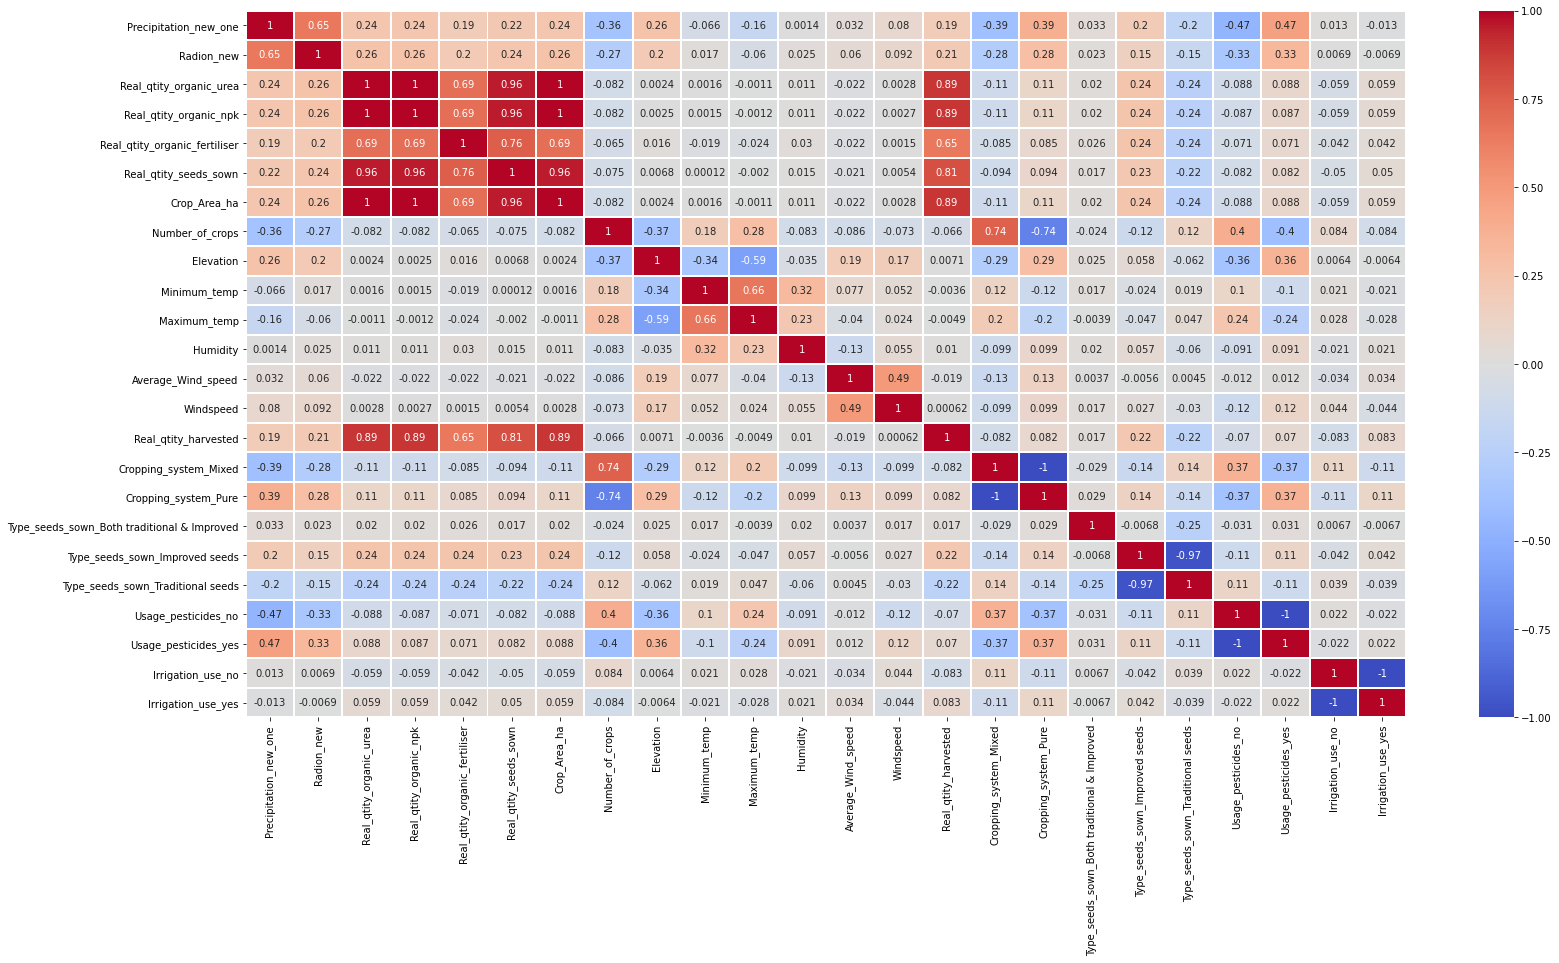

In [115]:
plt.figure(figsize=(26,13))
sns.heatmap(Irish_dframe.corr(),cmap='coolwarm', annot=True, linecolor='white',linewidths=1)

# Irish Model constructions

In [116]:
Irish_dframe.columns

Index(['Precipitation_new_one', 'Radion_new', 'Real_qtity_organic_urea',
       'Real_qtity_organic_npk', 'Real_qtity_organic_fertiliser',
       'Real_qtity_seeds_sown', 'Crop_Area_ha', 'Number_of_crops', 'Elevation',
       'Minimum_temp', 'Maximum_temp', 'Humidity', 'Average_Wind_speed',
       'Windspeed', 'Real_qtity_harvested', 'Cropping_system_Mixed',
       'Cropping_system_Pure', 'Type_seeds_sown_Both traditional & Improved',
       'Type_seeds_sown_Improved seeds', 'Type_seeds_sown_Traditional seeds',
       'Usage_pesticides_no', 'Usage_pesticides_yes', 'Irrigation_use_no',
       'Irrigation_use_yes'],
      dtype='object')

In [117]:
Irish_dframe.rename(columns={'Precipitation_new_one':'Precipitation',
                         'Radion_new':'Solar_radiatio',
                         'Real_qtity_organic_urea':'Total_qtity_urea',
                         'Real_qtity_organic_npk':'Total_qtity_npk',
                         'Real_qtity_organic_fertiliser':'Total_qtity_organic_fertiliser',
                         'Real_qtity_seeds_sown':'Total_qtity_seeds',
                         'Real_qtity_harvested':'Targted_variable'
                        }, inplace=True)

In [118]:
Irish_dframe.columns

Index(['Precipitation', 'Solar_radiatio', 'Total_qtity_urea',
       'Total_qtity_npk', 'Total_qtity_organic_fertiliser',
       'Total_qtity_seeds', 'Crop_Area_ha', 'Number_of_crops', 'Elevation',
       'Minimum_temp', 'Maximum_temp', 'Humidity', 'Average_Wind_speed',
       'Windspeed', 'Targted_variable', 'Cropping_system_Mixed',
       'Cropping_system_Pure', 'Type_seeds_sown_Both traditional & Improved',
       'Type_seeds_sown_Improved seeds', 'Type_seeds_sown_Traditional seeds',
       'Usage_pesticides_no', 'Usage_pesticides_yes', 'Irrigation_use_no',
       'Irrigation_use_yes'],
      dtype='object')

In [119]:
Irish_input=Irish_dframe[['Total_qtity_urea',
       'Total_qtity_npk', 'Total_qtity_organic_fertiliser',
       'Total_qtity_seeds','Targted_variable']]

<AxesSubplot:>

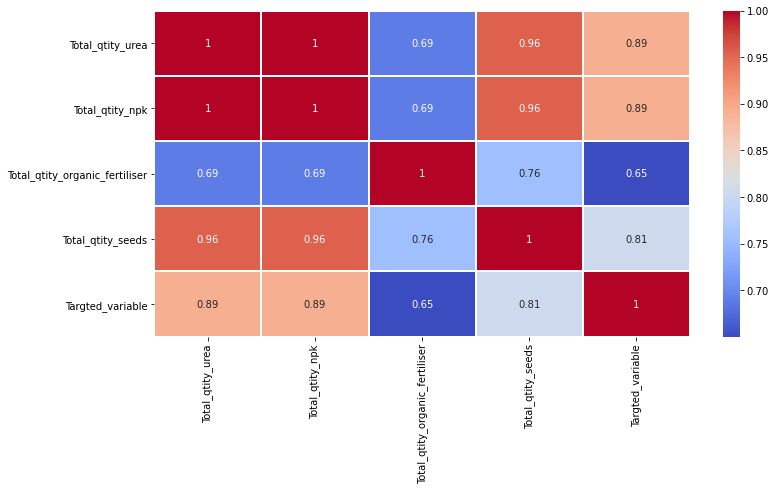

In [120]:
plt.figure(figsize=(12,6))
sns.heatmap(Irish_input.corr(),cmap='coolwarm', annot=True, linecolor='white',linewidths=1)

In [121]:
Irish_dframe.to_stata('Irish_dframe.dta')

C:\Users\Jean Damascene\anaconda3\lib\site-packages\pandas\io\stata.py:2398: InvalidColumnName:


Not all pandas column names were valid Stata variable names.
The following replacements have been made:

    Type_seeds_sown_Both traditional & Improved   ->   Type_seeds_sown_Both_traditional
    Type_seeds_sown_Improved seeds   ->   Type_seeds_sown_Improved_seeds
    Type_seeds_sown_Traditional seeds   ->   Type_seeds_sown_Traditional_seed

If this is not what you expect, please make sure you have Stata-compliant
column names in your DataFrame (strings only, max 32 characters, only
alphanumerics and underscores, no Stata reserved words)




In [122]:
quantile1=Irish_dframe['Targted_variable'].quantile(0.25)
quantile3=Irish_dframe['Targted_variable'].quantile(0.75)
iqr=quantile3-quantile1 # find interquartile of each crop in district
high_value=(1.5*iqr)+quantile3 # find the highest value of outliers
low_value=quantile1-(1.5*iqr)

In [123]:
print(high_value)

1395.0000000000005


In [124]:
mean = Irish_dframe.loc[Irish_dframe['Targted_variable']<high_value, 'Targted_variable'].mean()
mean
#Rice_df['Yield']= np.where(Rice_df['Yield'] >high_value, mean,Rice_df['Yield'])

288.4822896897233

In [125]:
Irish_dframe.rename(columns={'Targted_variable':'Production'}, inplace=True)

In [233]:
Irish_dframe['Total_qtity_urea_a']=Irish_dframe['Total_qtity_urea']/1000
Irish_dframe['Total_qtity_npk_a']=Irish_dframe['Total_qtity_npk']/1000
Irish_dframe['Precipitation_a']=Irish_dframe['Precipitation']/1000

Irish_dframe['Elevation_a']=Irish_dframe['Elevation']/12
Irish_dframe['Precipitation_a']=Irish_dframe['Precipitation']/12
Irish_dframe['Solar_radiatio_a']=Irish_dframe['Solar_radiatio']/12

Irish_dframe['Total_qtity_organic_fertiliser_a']=Irish_dframe['Total_qtity_organic_fertiliser']/1000
Irish_dframe['Total_qtity_seeds_a']=Irish_dframe['Total_qtity_seeds']/1000
Irish_dframe['Production_a']=Irish_dframe['Production']/1000

In [234]:
#,'Cropping_system_Pure','Usage_pesticides_yes', 'Irrigation_use_yes','Type_seeds_sown_Improved seeds'

X=Irish_dframe[['Precipitation_a', 'Solar_radiatio_a']]
       
Y=Irish_dframe['Production_a']

In [235]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.25,random_state=101)

In [236]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


In [237]:
scaler.fit(X)

StandardScaler()

In [238]:
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [239]:
X_train.shape

(6972, 2)

In [240]:
X_test.shape

(2324, 2)

# Creating a Model

In [241]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

In [242]:
model = Sequential()

model.add(Dense(11,activation='relu'))
model.add(Dense(11,activation='relu'))
model.add(Dense(11,activation='relu'))
model.add(Dense(11,activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

In [243]:
model.fit(x=X_train,y=Y_train.values,
          validation_data=(X_test,Y_test.values),
          batch_size=128,epochs=400)

Epoch 1/400
55/55 [==============================] - 1s 7ms/step - loss: 233.9583 - val_loss: 210.3969
Epoch 2/400
55/55 [==============================] - 0s 3ms/step - loss: 232.7598 - val_loss: 208.8451
Epoch 3/400
55/55 [==============================] - 0s 3ms/step - loss: 231.2021 - val_loss: 205.8874
Epoch 4/400
55/55 [==============================] - 0s 2ms/step - loss: 228.3264 - val_loss: 201.3901
Epoch 5/400
55/55 [==============================] - 0s 3ms/step - loss: 225.1682 - val_loss: 196.9251
Epoch 6/400
55/55 [==============================] - 0s 2ms/step - loss: 222.2461 - val_loss: 193.5882
Epoch 7/400
55/55 [==============================] - 0s 3ms/step - loss: 220.1848 - val_loss: 190.6509
Epoch 8/400
55/55 [==============================] - 0s 3ms/step - loss: 217.8539 - val_loss: 186.8977
Epoch 9/400
55/55 [==============================] - 0s 3ms/step - loss: 216.1605 - val_loss: 184.8046
Epoch 10/400
55/55 [==============================] - 0s 2ms/step - loss:

55/55 [==============================] - 0s 3ms/step - loss: 128.9260 - val_loss: 62.3773
Epoch 160/400
55/55 [==============================] - 0s 2ms/step - loss: 134.5164 - val_loss: 62.7331
Epoch 161/400
55/55 [==============================] - 0s 2ms/step - loss: 128.9638 - val_loss: 61.0397
Epoch 162/400
55/55 [==============================] - 0s 2ms/step - loss: 129.2546 - val_loss: 60.8763
Epoch 163/400
55/55 [==============================] - 0s 2ms/step - loss: 128.3253 - val_loss: 61.7570
Epoch 164/400
55/55 [==============================] - 0s 2ms/step - loss: 128.9017 - val_loss: 61.9728
Epoch 165/400
55/55 [==============================] - 0s 2ms/step - loss: 128.9793 - val_loss: 62.3997
Epoch 166/400
55/55 [==============================] - 0s 2ms/step - loss: 128.5327 - val_loss: 61.8946
Epoch 167/400
55/55 [==============================] - 0s 2ms/step - loss: 129.0242 - val_loss: 61.6450
Epoch 168/400
55/55 [==============================] - 0s 2ms/step - loss: 129

Epoch 238/400
55/55 [==============================] - 0s 2ms/step - loss: 130.1948 - val_loss: 61.7695
Epoch 239/400
55/55 [==============================] - 0s 2ms/step - loss: 131.2576 - val_loss: 63.7807
Epoch 240/400
55/55 [==============================] - 0s 2ms/step - loss: 135.0351 - val_loss: 61.6990
Epoch 241/400
55/55 [==============================] - 0s 2ms/step - loss: 128.4949 - val_loss: 61.33312
Epoch 242/400
55/55 [==============================] - 0s 2ms/step - loss: 128.3211 - val_loss: 61.3200
Epoch 243/400
55/55 [==============================] - 0s 2ms/step - loss: 128.0864 - val_loss: 61.3532
Epoch 244/400
55/55 [==============================] - 0s 2ms/step - loss: 130.9709 - val_loss: 61.8854
Epoch 245/400
55/55 [==============================] - 0s 3ms/step - loss: 128.7939 - val_loss: 61.1281
Epoch 246/400
55/55 [==============================] - 0s 3ms/step - loss: 128.5792 - val_loss: 61.2298
Epoch 247/400
55/55 [==============================] - 0s 4ms/s

Epoch 317/400
55/55 [==============================] - 0s 2ms/step - loss: 128.7509 - val_loss: 62.1710
Epoch 318/400
55/55 [==============================] - 0s 2ms/step - loss: 128.9535 - val_loss: 62.4981
Epoch 319/400
55/55 [==============================] - 0s 2ms/step - loss: 128.6622 - val_loss: 61.5989
Epoch 320/400
55/55 [==============================] - 0s 2ms/step - loss: 128.3954 - val_loss: 61.2874
Epoch 321/400
55/55 [==============================] - 0s 2ms/step - loss: 128.0044 - val_loss: 61.2713
Epoch 322/400
55/55 [==============================] - 0s 2ms/step - loss: 128.4704 - val_loss: 60.8188
Epoch 323/400
55/55 [==============================] - 0s 2ms/step - loss: 129.4002 - val_loss: 61.7070
Epoch 324/400
55/55 [==============================] - 0s 2ms/step - loss: 128.5063 - val_loss: 61.0663
Epoch 325/400
55/55 [==============================] - 0s 2ms/step - loss: 129.2878 - val_loss: 61.4332
Epoch 326/400
55/55 [==============================] - 0s 2ms/st

Epoch 396/400
55/55 [==============================] - 0s 2ms/step - loss: 129.8699 - val_loss: 61.0070
Epoch 397/400
55/55 [==============================] - 0s 2ms/step - loss: 129.3575 - val_loss: 61.7399
Epoch 398/400
55/55 [==============================] - 0s 2ms/step - loss: 128.0472 - val_loss: 62.0460
Epoch 399/400
55/55 [==============================] - 0s 2ms/step - loss: 129.0680 - val_loss: 61.0667
Epoch 400/400
55/55 [==============================] - 0s 2ms/step - loss: 127.8781 - val_loss: 61.4807


In [244]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

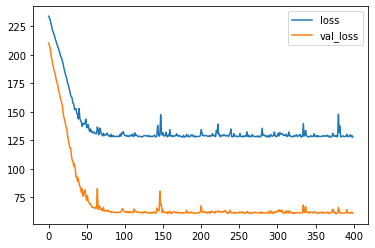

In [245]:
losses.plot()

In [246]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score,r2_score

In [247]:
predictions = model.predict(X_test)

In [248]:
explained_variance_score(Y_test,predictions)

0.7057544617324683

In [249]:
from sklearn.metrics import r2_score

In [250]:
# calculate these metrics by hand!
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(Y_test, predictions))
print('MSE:', metrics.mean_squared_error(Y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, predictions)))
print('r2_score:',metrics.r2_score(Y_test, predictions))

MAE: 0.5980919277373586
MSE: 61.4806901699656
RMSE: 7.840962324228168
r2_score: 0.7055754083827405


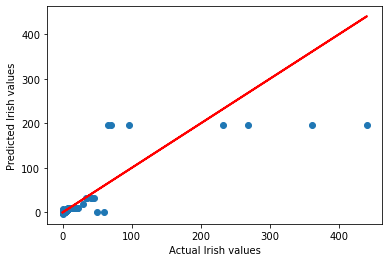

In [251]:
# Our predictions
plt.scatter(Y_test,predictions)

# Perfect predictions
plt.plot(Y_test,Y_test,'r',linewidth=2)
plt.xlabel('Actual Irish values')
plt.ylabel('Predicted Irish values')
plt.show()

# Working on Predicted Model, by Using PCA

In [252]:
'''#'Cropping_system_Pure','Usage_pesticides_yes', 'Irrigation_use_yes','Type_seeds_sown_Improved seeds'
X=Irish_dframe[['Precipitation', 'Solar_radiatio', 'Total_qtity_urea',
       'Total_qtity_npk', 'Total_qtity_organic_fertiliser',
       'Total_qtity_seeds', 'Crop_Area_ha']]
y=Irish_dframe['Targted_variable']'''

"#'Cropping_system_Pure','Usage_pesticides_yes', 'Irrigation_use_yes','Type_seeds_sown_Improved seeds'\nX=Irish_dframe[['Precipitation', 'Solar_radiatio', 'Total_qtity_urea',\n       'Total_qtity_npk', 'Total_qtity_organic_fertiliser',\n       'Total_qtity_seeds', 'Crop_Area_ha']]\ny=Irish_dframe['Targted_variable']"

In [253]:
#, 'Crop_Area_ha'
X=Irish_dframe[['Precipitation_a', 'Solar_radiatio_a',
       'Total_qtity_npk_a', 'Total_qtity_organic_fertiliser_a','Total_qtity_urea_a',
       'Total_qtity_seeds_a','Crop_Area_ha']]
Y=Irish_dframe['Production_a']

In [254]:
from sklearn.preprocessing import StandardScaler
scaler1 = StandardScaler()

In [255]:
scaler1.fit(X)

StandardScaler()

In [256]:
scaled_data = scaler1.transform(X)

In [257]:
from sklearn.decomposition import PCA

In [258]:
pca = PCA(n_components=2)
pca.fit(scaled_data)

PCA(n_components=2)

In [259]:
X_pca= pca.transform(scaled_data)

In [260]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [261]:
X_train, X_test, Y_train, Y_test = train_test_split(X_pca,Y,test_size=0.25,random_state=101)

In [262]:
print(X_train.shape,Y_train.shape)

(6972, 2) (6972,)


In [263]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout,Flatten
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

In [264]:
model = Sequential()

model.add(Dense(11,activation='relu'))
model.add(Dense(11,activation='relu'))
model.add(Dense(11,activation='relu'))
model.add(Dense(11,activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

In [265]:
model.fit(x=X_train,y=Y_train.values,verbose=0,
          validation_data=(X_test,Y_test.values),
          batch_size=128,epochs=400)

In [266]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 11)                33        
_________________________________________________________________
dense_16 (Dense)             (None, 11)                132       
_________________________________________________________________
dense_17 (Dense)             (None, 11)                132       
_________________________________________________________________
dense_18 (Dense)             (None, 11)                132       
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 12        
Total params: 441
Trainable params: 441
Non-trainable params: 0
_________________________________________________________________


In [267]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

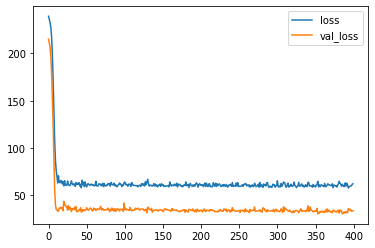

In [268]:
losses.plot()

In [269]:
prediction1=model.predict(X_test)

In [270]:
explained_variance_score(Y_test,prediction1)

0.8394009739214738

In [271]:
# calculate these metrics by hand!
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(Y_test, prediction1))
print('MSE:', metrics.mean_squared_error(Y_test, prediction1))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, prediction1)))
print('r2_score:',metrics.r2_score(Y_test, prediction1))

MAE: 0.5664307679272733
MSE: 33.55777838858557
RMSE: 5.792907593651531
r2_score: 0.8392953109288862


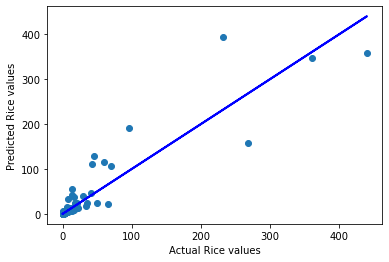

In [272]:
# Our predictions
plt.scatter(Y_test,prediction1)

# Perfect predictions
plt.plot(Y_test,Y_test,'b',linewidth=2)
plt.xlabel('Actual Rice values')
plt.ylabel('Predicted Rice values')
plt.show()

# Working on Polynomial Regression

In [273]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

In [274]:
#'Minimum_temp', 'Maximum_temp','Type_seeds_sown_Improved seeds','Usage_pesticides_yes','Type_seeds_sown_Improved seeds'
#X_poly=Irish_dframe[['Precipitation', 'Solar_radiatio', 'Total_qtity_urea',
       #'Total_qtity_npk', 'Total_qtity_organic_fertiliser',
     #  'Total_qtity_seeds', 'Crop_Area_ha']]
#Y_poly=Irish_dframe['Targted_variable']

In [275]:
#Define the polynomial features
poly=PolynomialFeatures(degree=2)


In [276]:
#Split our data into training set and test set
poly_X_train, poly_X_test, poly_Y_train, poly_Y_test = train_test_split(X_pca,Y, test_size = 0.25, random_state = 4)

In [277]:
#Make transformation of predictors for both training and test sets
poly_X_train=poly.fit_transform(poly_X_train)
poly_X_test=poly.fit_transform(poly_X_test)

In [278]:
regression = LinearRegression()#Define Linear regression model

In [279]:
regression.fit(poly_X_train,poly_Y_train)# Create our model


LinearRegression()

In [280]:
#Predicting our needed value
pred_test=regression.predict(poly_X_test)
pred_train=regression.predict(poly_X_train)

In [281]:
explained_variance_score(poly_Y_test, pred_test)

0.9476236786337493

In [282]:
# Model evaluations
print('MAE:', metrics.mean_absolute_error(poly_Y_test, pred_test))
print('MSE:', metrics.mean_squared_error(poly_Y_test, pred_test))
print('RMSE:', np.sqrt(metrics.mean_squared_error(poly_Y_test, pred_test)))
print('r2_score:',metrics.r2_score(poly_Y_test, pred_test))

MAE: 0.3972653993978565
MSE: 3.2951427130858453
RMSE: 1.8152527959173745
r2_score: 0.9475817721837289


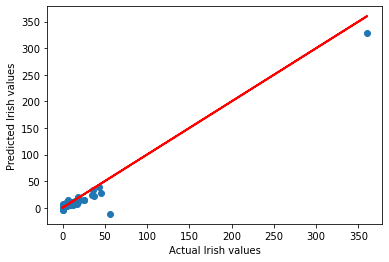

In [283]:
# Our predictions
plt.scatter(poly_Y_test, pred_test)

# Perfect predictions
plt.plot(poly_Y_test,poly_Y_test,'r',linewidth=2)
plt.xlabel('Actual Irish values')
plt.ylabel('Predicted Irish values')
plt.show()

# Working on Linear Regression

In [284]:
#'Minimum_temp', 'Maximum_temp','Type_seeds_sown_Improved seeds','Usage_pesticides_yes','Type_seeds_sown_Improved seeds'
#X_Multi=Irish_dframe[['Precipitation', 'Solar_radiatio', 'Total_qtity_urea',
#       'Total_qtity_npk', 'Total_qtity_organic_fertiliser',
 #      'Total_qtity_seeds', 'Crop_Area_ha']]
#Y=Irish_dframe['Targted_variable']

In [285]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_pca, Y, test_size=0.25, random_state=101)

In [286]:
from sklearn.linear_model import LinearRegression

In [287]:
lreg = LinearRegression()

In [288]:
lreg.fit(X_train1,y_train1)

LinearRegression()

In [289]:
# print the intercept
print(lreg.intercept_)

1.3677683794766347


In [290]:
print(lreg.coef_)

[6.25573901 1.77455203]


In [291]:
#coeff_df = pd.DataFrame(lreg.coef_,X_pca.columns,columns=[['Coefficient']])
#coeff_df

# Prodiction by Linear regression

In [292]:
predictions2 = lreg.predict(X_test1)

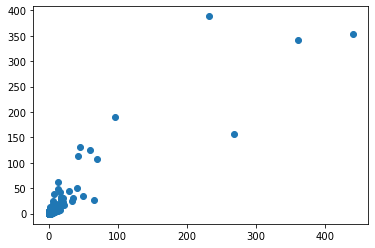

In [293]:
plt.scatter(y_test1,predictions2)

In [294]:
print('MAE:', metrics.mean_absolute_error(y_test1, predictions2))
print('MSE:', metrics.mean_squared_error(y_test1, predictions2))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test1, predictions2)))
print('r2_score:',metrics.r2_score(y_test1, predictions2))

MAE: 0.9228857292676502
MSE: 35.38573413486966
RMSE: 5.948590936925286
r2_score: 0.830541422145168


In [295]:
explained_variance_score(y_test1, predictions2)

0.8307318344926755

# Working on Dataframe by using Keras

In [296]:
dataframe=Irish_df[['Precipitation1','Elev','Usage_pesticides_yes','Usage_inorganic_fertilizer_yes',
           'Usage_organic_fertilizer_yes','Qtity_seeds_sown', 'Total_qtity_harvested','Year','Yield']]

KeyError: "['Usage_pesticides_yes', 'Usage_organic_fertilizer_yes', 'Usage_inorganic_fertilizer_yes', 'Elev', 'Precipitation1'] not in index"

In [ ]:
data1=dataframe.values

In [ ]:
X, y = data1[:, 0:8], data1[:, 8]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.neighbors import LocalOutlierFactor

In [ ]:
# identify outliers in the training dataset
lof1 = LocalOutlierFactor()
yhat1 = lof1.fit_predict(X_train)

In [ ]:
# select all rows that are not outliers
mask = yhat1 != -1
X_train, y_train = X_train[mask, :], y_train[mask]
# summarize the shape of the updated training dataset

In [ ]:
model = Sequential()

model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

In [ ]:
model.fit(x=X_train,y=y_train,
          validation_data=(X_test,y_test),
          batch_size=128,epochs=400)

In [ ]:
losses = pd.DataFrame(model.history.history)

In [ ]:
losses.plot()

In [ ]:
predictions=model.predict(X_test)
explained_variance_score(y_test,predictions)

In [ ]:
# Our predictions
plt.scatter(y_test,predictions,color='c', marker='o')

# Perfect predictions
plt.plot(y_test,y_test,'g',linewidth=2)
plt.xlabel('Actual Irish yield')
plt.ylabel('Predicted Irish yield')
plt.show()

In [ ]:
kk

In [ ]:
#Irish_df['Yield']

In [ ]:
dataframe.values[:,8]

In [ ]:

# Regression Example With Boston Dataset: Baseline
from pandas import read_excel
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
# load dataset
#dataframe = read_csv("housing.csv", delim_whitespace=True, header=None)
dataset = dataframe.values
# split into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8]
# define base model
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(8, input_dim=8, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model
# evaluate model
estimator = KerasRegressor(build_fn=baseline_model, epochs=100, batch_size=5, verbose=0)
kfold = KFold(n_splits=7)
results = cross_val_score(estimator, X, Y, cv=kfold)
print("Baseline: %.2f (%.2f) MSE" % (results.mean(), results.std()))

In [ ]:
# Regression Example With Boston Dataset: Standardized and Wider
from pandas import read_csv
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
# load dataset
#dataframe = read_csv("housing.csv", delim_whitespace=True, header=None)
dataframe=Irish_df[['Precipitation1','Elev','Usage_pesticides_yes','Usage_inorganic_fertilizer_yes',
           'Usage_organic_fertilizer_yes','Qtity_seeds_sown', 'Total_qtity_harvested','Year','Yield']]
dataset = dataframe.values
# split into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8]
# define wider model
def wider_model():
    # create model
    model = Sequential()
    model.add(Dense(15, input_dim=8, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model
# evaluate model with standardized dataset
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasRegressor(build_fn=wider_model, epochs=100, batch_size=5, verbose=0)))
pipeline = Pipeline(estimators)
kfold = KFold(n_splits=10)
results = cross_val_score(pipeline, X, Y, cv=kfold)
print("Wider: %.2f (%.2f) MSE" % (results.mean(), results.std()))